In [70]:
import pandas as pd
pd_gaia2mass = pd.read_csv("xmatch_gaiadr2_2MASS_3x3.csv")
print(len(pd_gaia2mass))
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

557690


solution_id                   designation            source_id  \
0  1635721458409799680  Gaia DR2 4057234194683722624  4057234194683722624   
1  1635721458409799680  Gaia DR2 4057236874753650816  4057236874753650816   
2  1635721458409799680  Gaia DR2 4057238210481316608  4057238210481316608   
3  1635721458409799680  Gaia DR2 4057242436730637696  4057242436730637696   
4  1635721458409799680  Gaia DR2 4057238897667174272  4057238897667174272   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0     743862084     2015.5  267.326967  0.602908 -29.430748   0.519166   
1    1628899401     2015.5  267.399136  6.526647 -29.297115   6.204381   
2     495715722     2015.5  267.354180  1.067236 -29.309192   0.875958   
3     123928930     2015.5  267.584039  4.528629 -29.257969   2.199722   
4     260288896     2015.5  267.230318  0.029488 -29.314361   0.024972   

   parallax  parallax_error  parallax_over_error      pmra  pmra_error  \
0       NaN             NaN                  NaN       NaN         NaN   
1       NaN             NaN                  NaN       NaN         NaN   
2 -0.595517        0.974607            -0.611033 -0.286866    2.448783   
3       NaN             NaN                  NaN       NaN         NaN   
4  0.391080        0.032119            12.175854 -2.327713    0.063452   

      pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  ra_pmra_corr  \
0       NaN          NaN     0.531343               NaN           NaN   
1       NaN          NaN     0.968394               NaN           NaN   
2 -3.755592     1.873154     0.473540          0.091644     -0.487377   
3       NaN          NaN     0.694846               NaN           NaN   
4 -3.587288     0.049980     0.174317         -0.154447     -0.209745   

   ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  dec_pmdec_corr  \
0            NaN                NaN            NaN             NaN   
1            NaN                NaN            NaN             NaN   
2      -0.330471          -0.081283      -0.361679       -0.525767   
3            NaN                NaN            NaN             NaN   
4      -0.165492          -0.314490      -0.126729       -0.320095   

   parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0                 NaN                  NaN              NaN   
1                 NaN                  NaN              NaN   
2           -0.076831             0.249980         0.599329   
3                 NaN                  NaN              NaN   
4           -0.018208             0.271452         0.246525   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   112                     0                        112   
1                    81                     0                         80   
2                   114                     0                        112   
3                    63                     0                         63   
4                   158                     0                        158   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         0            6.459486            230.92513   
1                         1            7.888156            217.66966   
2                         2            4.428858            184.78362   
3                         0            2.310668             85.74773   
4                         0           -2.615557            111.11614   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  2.281447                      5.050162   
1                  5.400749                     16.340354   
2                  3.643056                      5.502606   
3                  3.677413                      2.561082   
4                  0.000000                      0.000000   

   astrometric_params_solved  astrometric_primary_flag  astrometric_weight_al  \
0                          3                     False               0.082999   


In [71]:
import numpy as np
pd_gaia2mass["l"] = np.where(pd_gaia2mass["l"] >180, pd_gaia2mass["l"] -360, pd_gaia2mass["l"] )
pd_gaia2mass["Hw"] = pd_gaia2mass["h_m"] + 0.75 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) - 0.027 * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]) * (pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"])
pd_gaia2mass["j_h"] = pd_gaia2mass["j_m"]-pd_gaia2mass["h_m"]
pd_gaia2mass["j_k"] = pd_gaia2mass["j_m"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["g_k"] = pd_gaia2mass["phot_g_mean_mag"]-pd_gaia2mass["ks_m"]
pd_gaia2mass["distance"] = 1 / pd_gaia2mass["parallax"]* 1000
pd_gaia2mass["Mg"] = pd_gaia2mass["phot_g_mean_mag"] - (5 * np.log10(1 / pd_gaia2mass["parallax"]* 1000) - 5)
pd_gaia2mass['distance_from_center'] = np.sqrt(pd_gaia2mass["l"]*pd_gaia2mass["l"]+pd_gaia2mass["b"]*pd_gaia2mass["b"])
pd.set_option('display.max_columns', 200)
pd_gaia2mass.head()

/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


solution_id                   designation            source_id  \
0  1635721458409799680  Gaia DR2 4057234194683722624  4057234194683722624   
1  1635721458409799680  Gaia DR2 4057236874753650816  4057236874753650816   
2  1635721458409799680  Gaia DR2 4057238210481316608  4057238210481316608   
3  1635721458409799680  Gaia DR2 4057242436730637696  4057242436730637696   
4  1635721458409799680  Gaia DR2 4057238897667174272  4057238897667174272   

   random_index  ref_epoch          ra  ra_error        dec  dec_error  \
0     743862084     2015.5  267.326967  0.602908 -29.430748   0.519166   
1    1628899401     2015.5  267.399136  6.526647 -29.297115   6.204381   
2     495715722     2015.5  267.354180  1.067236 -29.309192   0.875958   
3     123928930     2015.5  267.584039  4.528629 -29.257969   2.199722   
4     260288896     2015.5  267.230318  0.029488 -29.314361   0.024972   

   parallax  parallax_error  parallax_over_error      pmra  pmra_error  \
0       NaN             NaN                  NaN       NaN         NaN   
1       NaN             NaN                  NaN       NaN         NaN   
2 -0.595517        0.974607            -0.611033 -0.286866    2.448783   
3       NaN             NaN                  NaN       NaN         NaN   
4  0.391080        0.032119            12.175854 -2.327713    0.063452   

      pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  ra_pmra_corr  \
0       NaN          NaN     0.531343               NaN           NaN   
1       NaN          NaN     0.968394               NaN           NaN   
2 -3.755592     1.873154     0.473540          0.091644     -0.487377   
3       NaN          NaN     0.694846               NaN           NaN   
4 -3.587288     0.049980     0.174317         -0.154447     -0.209745   

   ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  dec_pmdec_corr  \
0            NaN                NaN            NaN             NaN   
1            NaN                NaN            NaN             NaN   
2      -0.330471          -0.081283      -0.361679       -0.525767   
3            NaN                NaN            NaN             NaN   
4      -0.165492          -0.314490      -0.126729       -0.320095   

   parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
0                 NaN                  NaN              NaN   
1                 NaN                  NaN              NaN   
2           -0.076831             0.249980         0.599329   
3                 NaN                  NaN              NaN   
4           -0.018208             0.271452         0.246525   

   astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
0                   112                     0                        112   
1                    81                     0                         80   
2                   114                     0                        112   
3                    63                     0                         63   
4                   158                     0                        158   

   astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
0                         0            6.459486            230.92513   
1                         1            7.888156            217.66966   
2                         2            4.428858            184.78362   
3                         0            2.310668             85.74773   
4                         0           -2.615557            111.11614   

   astrometric_excess_noise  astrometric_excess_noise_sig  \
0                  2.281447                      5.050162   
1                  5.400749                     16.340354   
2                  3.643056                      5.502606   
3                  3.677413                      2.561082   
4                  0.000000                      0.000000   

   astrometric_params_solved  astrometric_primary_flag  astrometric_weight_al  \
0                          3                     False               0.082999   


In [72]:
min_l = -2
max_l = 0.7
min_b = 0
max_b = 0.3
pd_gaia2mass_jsky = pd_gaia2mass.query( '(@min_l <= l <= @max_l and @min_b <= b <= @max_b) or distance_from_center<0.7')
print(len(pd_gaia2mass_jsky))
pd_gaia2mass_jsky.to_csv("xmatch_gaiadr2_2MASS_v2.csv")
pd_gaia2mass_jsky.head()

78144


solution_id                   designation            source_id  \
5834  1635721458409799680  Gaia DR2 4057268898049360640  4057268898049360640   
5835  1635721458409799680  Gaia DR2 4057279583928524928  4057279583928524928   
5836  1635721458409799680  Gaia DR2 4057264362547988608  4057264362547988608   
5837  1635721458409799680  Gaia DR2 4057272265303774080  4057272265303774080   
5839  1635721458409799680  Gaia DR2 4057273193016794112  4057273193016794112   

      random_index  ref_epoch          ra  ra_error        dec  dec_error  \
5834    1566953147     2015.5  266.695097  0.116952 -29.417252   0.111017   
5835     695572282     2015.5  266.911906  0.101651 -29.187356   0.089886   
5836     347786141     2015.5  266.914778  0.721168 -29.329002   0.589461   
5837      21736633     2015.5  266.765185  0.159832 -29.277068   0.140489   
5839    1004790326     2015.5  266.571792  0.325854 -29.317224   0.290406   

      parallax  parallax_error  parallax_over_error       pmra  pmra_error  \
5834  0.466793        0.144835             3.222931  -3.229623    0.266642   
5835  3.741059        0.114314            32.726303  16.291216    0.198903   
5836  0.267250        0.629332             0.424656  -0.639668    1.565364   
5837  0.406675        0.156754             2.594347  -2.061540    0.286251   
5839  2.592812        0.363985             7.123396  15.172106    0.732962   

          pmdec  pmdec_error  ra_dec_corr  ra_parallax_corr  ra_pmra_corr  \
5834  -3.503299     0.186004    -0.165817          0.202310      0.226405   
5835   4.881490     0.148684     0.313609         -0.077598     -0.364406   
5836  -0.444638     1.204134     0.573681          0.150964     -0.578139   
5837   1.703203     0.223746     0.541355         -0.118303     -0.373240   
5839 -17.852721     0.633019     0.238652         -0.062387     -0.123544   

      ra_pmdec_corr  dec_parallax_corr  dec_pmra_corr  dec_pmdec_corr  \
5834      -0.251522          -0.572726      -0.436511       -0.114773   
5835      -0.305282          -0.453523      -0.174843       -0.498974   
5836      -0.539610          -0.239946      -0.457947       -0.550821   
5837      -0.513390          -0.404785      -0.387161       -0.520329   
5839      -0.301291          -0.332228      -0.253628       -0.231743   

      parallax_pmra_corr  parallax_pmdec_corr  pmra_pmdec_corr  \
5834            0.260638             0.211606         0.139436   
5835           -0.200314             0.278881         0.215135   
5836           -0.256608             0.048425         0.673696   
5837           -0.168086             0.206105         0.434182   
5839           -0.102026             0.258847         0.498334   

      astrometric_n_obs_al  astrometric_n_obs_ac  astrometric_n_good_obs_al  \
5834                    96                     0                         96   
5835                   139                     0                        139   
5836                   111                     0                        111   
5837                   157                     0                        156   
5839                   124                     0                        121   

      astrometric_n_bad_obs_al  astrometric_gof_al  astrometric_chi2_al  \
5834                         0            2.926137            135.58752   
5835                         0            2.868380            185.82576   
5836                         0            3.728720            169.17528   
5837                         1            3.093970            210.56851   
5839                         3            1.207496            134.64354   

      astrometric_excess_noise  astrometric_excess_noise_sig  \
5834                  0.255786                      1.175713   
5835                  0.283039                      1.850702   
5836                  1.919875                      3.467713   
5837                  0.361404                      1.363105   
5839                  0.699904                      1.10

In [73]:
min_Hw_b = 3.0
max_Hw_b = 9.5
pd_gaia2mass_b = pd_gaia2mass.query( '@min_Hw_b <= Hw < @max_Hw_b')
pd_gaia2mass_jsky_b = pd_gaia2mass_jsky.query( '@min_Hw_b <= Hw < @max_Hw_b')
print(len(pd_gaia2mass_jsky_b))

min_Hw_t = 9.5
max_Hw_t = 15.0
pd_gaia2mass_t = pd_gaia2mass.query( '@min_Hw_t <= Hw < @max_Hw_t')
pd_gaia2mass_jsky_t = pd_gaia2mass_jsky.query( '@min_Hw_t <= Hw < @max_Hw_t')
print(len(pd_gaia2mass_jsky_t))

min_parallax_f = 1
max_parallax_f = 5
pd_gaia2mass_f = pd_gaia2mass.query( '@min_parallax_f <= parallax < @max_parallax_f')
pd_gaia2mass_jsky_f = pd_gaia2mass_jsky.query( '@min_parallax_f <= parallax < @max_parallax_f')
print(len(pd_gaia2mass_f))
print(len(pd_gaia2mass_jsky_f))

min_parallax_n = 5
max_parallax_n = 10
pd_gaia2mass_n = pd_gaia2mass.query( '@min_parallax_n <= parallax < @max_parallax_n')
pd_gaia2mass_jsky_n = pd_gaia2mass_jsky.query( '@min_parallax_n <= parallax < @max_parallax_n')
print(len(pd_gaia2mass_n))
print(len(pd_gaia2mass_jsky_n))

min_parallax_m = 10
max_parallax_m = 100
pd_gaia2mass_m = pd_gaia2mass.query( '@min_parallax_m <= parallax < @max_parallax_m')
pd_gaia2mass_jsky_m = pd_gaia2mass_jsky.query( '@min_parallax_m <= parallax < @max_parallax_m')
print(len(pd_gaia2mass_m))
print(len(pd_gaia2mass_jsky_m))

min_parallax_s = 2
max_parallax_s = 100
min_Hw_s = 9.5
max_Hw_s = 15.0
pd_gaia2mass_s = pd_gaia2mass.query( '@min_parallax_s <= parallax < @max_parallax_s and @min_Hw_s <= Hw < @max_Hw_s')
pd_gaia2mass_jsky_s = pd_gaia2mass_jsky.query( '@min_parallax_s <= parallax < @max_parallax_s and @min_Hw_s <= Hw < @max_Hw_s')
print(len(pd_gaia2mass_s))
print(len(pd_gaia2mass_jsky_s))

612
59085
41595
8781
736
111
84
14
8335
1233


In [74]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.2

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/345/gaia2" # Gaia DR2 (Gaia Collaboration, 2018) I/345/gaia2
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
3016


RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source     Plx  \
0  266.511790     0.5185 -29.030391     0.4833  4057469417147701248  0.1067   
1  266.516151     0.3381 -29.029771     0.3096  4057469417147701888  0.1295   
2  266.517345     0.5207 -29.027233     0.4762  4057469417147702272  0.6590   
3  266.516624     0.3803 -29.028419     0.3494  4057469417147012608  0.1489   
4  266.518102     0.1931 -29.031710     0.1740  4057469417147009152  0.2076   

    e_Plx   pmRA  e_pmRA   pmDE  e_pmDE  Dup           FG    e_FG     Gmag  \
0  0.5131  2.154   1.098 -1.746   0.900    0   312.480011  1.7562  19.4513   
1  0.3369 -5.857   0.610 -3.134   0.457    0   458.369995  1.5877  19.0353   
2  0.5069 -2.415   1.095 -4.890   0.876    0   271.549988  1.3827  19.6038   
3  0.3783  0.194   0.801 -0.335   0.650    0   422.929993  1.5331  19.1227   
4  0.1885  2.204   0.369 -0.386   0.290    0  1104.500000  2.0691  18.0805   

   e_Gmag         FBP    e_FBP    BPmag  e_BPmag          FRP      e_FRP  \
0  0.0061  107.349998   9.8908  20.2744   0.1000   346.760010  20.941999   
1  0.0038  135.600006  10.1230  20.0207   0.0811   507.899994  15.960000   
2  0.0055   73.990997   8.7127  20.6784   0.1278   264.940002  22.302000   
3  0.0039  137.199997   8.9550  20.0080   0.0709   501.839996  28.216000   
4  0.0020  362.459991   7.7599  18.9532   0.0232  1078.000000  13.566000   

     RPmag  e_RPmag   BP-RP  RV  e_RV  Teff  AG  E_BP-RP_  Rad  Lum  \
0  18.4119   0.0656  1.8625 NaN   NaN   NaN NaN       NaN  NaN  NaN   
1  17.9975   0.0341  2.0232 NaN   NaN   NaN NaN       NaN  NaN  NaN   
2  18.7041   0.0914  1.9744 NaN   NaN   NaN NaN       NaN  NaN  NaN   
3  18.0105   0.0610  1.9975 NaN   NaN   NaN NaN       NaN  NaN  NaN   
4  17.1803   0.0137  1.7729 NaN   NaN   NaN NaN       NaN  NaN  NaN   

         GLON      GLAT  
0  359.968199 -0.128813  
1  359.970712 -0.131747  
2  359.973422 -0.131319  
3  359.972082 -0.131397  
4  359.969944 -0.134213

In [75]:
pd_gaiadr2 = table_pd
pd_gaiadr2["GLON"] = np.where(pd_gaiadr2["GLON"]>180, pd_gaiadr2["GLON"]-360, pd_gaiadr2["GLON"])
pd_gaiadr2.tail()

RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source  \
3011  266.443101     0.0663 -28.839275     0.0550  4057493129668933888   
3012  266.446432     5.5584 -28.837677     4.4050  4057493129664846848   
3013  266.439699     0.1360 -28.840089     0.1126  4057493125366748928   
3014  266.447209     0.1973 -28.836359     0.1678  4057493125367265920   
3015  266.355355     0.1748 -28.837597     0.1416  4057493679424405248   

         Plx   e_Plx   pmRA  e_pmRA   pmDE  e_pmDE  Dup            FG    e_FG  \
3011  0.8951  0.0642  0.786   0.131 -1.319   0.095    0  11633.000000  6.9885   
3012     NaN     NaN    NaN     NaN    NaN     NaN    0    144.039993  1.1306   
3013  0.4423  0.1115  2.410   0.250 -0.427   0.183    0   2134.100098  2.3237   
3014  0.3997  0.1899  2.501   0.404 -0.833   0.289    0   1034.699951  2.1995   
3015  0.4076  0.1533  0.968   0.315 -1.007   0.224    0   1562.099976  2.8472   

         Gmag  e_Gmag          FBP      e_FBP    BPmag  e_BPmag           FRP  \
3011  15.5241  0.0007  3989.899902  21.976999  16.3490   0.0060  11438.000000   
3012  20.2922  0.0085    37.803001  11.837000  21.4076   0.3400    203.100006   
3013  17.3653  0.0012   515.630005  14.289000  18.5705   0.0301   2546.600098   
3014  18.1513  0.0023   293.410004  14.845000  19.1827   0.0549   1213.099976   
3015  17.7041  0.0020   514.780029   8.837100  18.5723   0.0186   1533.900024   

          e_FRP    RPmag  e_RPmag   BP-RP  RV  e_RV     Teff      AG  \
3011  14.669000  14.6161   0.0014  1.7329 NaN   NaN  4258.98  2.6885   
3012  20.219000  18.9926   0.1081  2.4150 NaN   NaN      NaN     NaN   
3013  10.109000  16.2470   0.0043  2.3235 NaN   NaN      NaN     NaN   
3014  26.552999  17.0522   0.0238  2.1305 NaN   NaN      NaN     NaN   
3015  18.641001  16.7974   0.0132  1.7749 NaN   NaN      NaN     NaN   

      E_BP-RP_   Rad    Lum      GLON      GLAT  
3011    1.3568  1.67  0.822  0.100094  0.021993  
3012       NaN   NaN    NaN  0.102978  0.020334  
3013       NaN   NaN    NaN  0.097848  0.024113  
3014       NaN   NaN    NaN  0.104458  0.020440  
3015       NaN   NaN    NaN  0.061475  0.088472

In [76]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

lcenter = 0
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree] # [266.10607547, -29.36261681] l=-0.5, b=0
print(sky_org)
width = 0.2

Vizier.ROW_LIMIT = -1
Vizier.TIMEOUT = 1800
Vizier.VIZIER_SERVER = "vizier.u-strasbg.fr"
Vizier.VIZIER_SERVER = "vizier.nao.ac.jp"

catalog = "I/350/gaiaedr3" # Gaia EDR3 (Gaia Collaboration, 2020) I/350/gaiaedr3
database = Vizier(columns=['*', 'GLON', 'GLAT'],row_limit=-1).query_region(SkyCoord(ra=sky_org[0]*u.degree, dec=sky_org[1]*u.degree, frame='icrs'), width=width*u.degree, catalog=catalog)
print(len(database[catalog]))

table_pd = database[catalog].to_pandas()
table_pd.head()

[266.4049882865447, -28.936177761791473]
3387


/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'PS1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SDSSDR13' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'SkyMapper2' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/omiya/anaconda3/envs/jasmine2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: TableReplaceWarning: converted column 'URAT1' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source     Plx  \
0  266.518103     0.1351 -29.031710     0.1104  4057469417147009152  0.3112   
1  266.516624     0.2731 -29.028419     0.2225  4057469417147012608  0.4434   
2  266.511790     0.3679 -29.030391     0.2973  4057469417147701248  0.3592   
3  266.516150     0.2357 -29.029772     0.1974  4057469417147701888  0.1971   
4  266.517345     0.4014 -29.027234     0.3183  4057469417147702272  0.7714   

    e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE           FG     e_FG  \
0  0.1480  2.600  2.531   0.170 -0.595   0.103  0.978  1139.900024  1.53370   
1  0.2921  1.391  1.389   0.343  0.082   0.208  0.955   442.920013  0.98590   
2  0.3911  1.617  0.478   0.457 -1.544   0.270  1.018   322.739990  0.96461   
3  0.2708  6.496 -5.864   0.321 -2.797   0.194  0.978   469.769989  0.98931   
4  0.4409  5.393 -2.648   0.506 -4.699   0.293  0.988   280.869995  0.94663   

        Gmag    e_Gmag         FBP   e_FBP      BPmag   e_BPmag          FRP  \
0  18.045218  0.003119  371.429993  6.0104  18.913836  0.017789  1085.599976   
1  19.071556  0.003665  121.309998  6.6292  20.128775  0.059396   555.640015   
2  19.415220  0.004257   80.181999  5.3325  20.578346  0.072261   343.519989   
3  19.007647  0.003580  116.129997  6.5920  20.176182  0.061694   522.010010   
4  19.566084  0.004581   68.646004  4.7636  20.747000  0.075395   278.839996   

     e_FRP      RPmag   e_RPmag     BP-RP  RVDR2  e_RVDR2  Tefftemp  loggtemp  \
0   5.8769  17.158686  0.006988  1.755150    NaN      NaN       NaN       NaN   
1  15.5900  17.885920  0.030697  2.242855    NaN      NaN       NaN       NaN   
2   7.2632  18.408012  0.023265  2.170334    NaN      NaN       NaN       NaN   
3   8.2891  17.953705  0.017650  2.222477    NaN      NaN       NaN       NaN   
4   6.7551  18.634525  0.026573  2.112474    NaN      NaN       NaN       NaN   

            PS1  SDSSDR13   SkyMapper2  URAT1   GmagCorr  e_GmagCorr  \
0  7.316267e+16       NaN  165230021.0    NaN  18.045218    0.003119   
1  7.316267e+16       NaN  165230025.0    NaN  19.071556    0.003665   
2  7.316267e+16       NaN  165230018.0    NaN  19.415220    0.004257   
3  7.316267e+16       NaN  165230024.0    NaN  18.994917    0.003564   
4  7.316267e+16       NaN  165230027.0    NaN  19.555307    0.004552   

        FGCorr     RAJ2000    DEJ2000        GLON      GLAT  
0  1139.900024  266.518090 -29.031707  359.969944 -0.134213  
1   442.920013  266.516617 -29.028419  359.972082 -0.131397  
2   322.739990  266.511788 -29.030384  359.968199 -0.128814  
3   475.309998  266.516180 -29.029759  359.970711 -0.131747  
4   283.679993  266.517358 -29.027213  359.973422 -0.131319

In [77]:
pd_gaiaedr3 = table_pd
pd_gaiaedr3["GLON"] = np.where(pd_gaiaedr3["GLON"]>180, pd_gaiaedr3["GLON"]-360, pd_gaiaedr3["GLON"])
pd_gaiaedr3.tail()

RA_ICRS  e_RA_ICRS    DE_ICRS  e_DE_ICRS               Source  \
3382  266.443376    11.9167 -28.837063    10.1840  4057493129667085568   
3383  266.443101     0.0501 -28.839276     0.0366  4057493129668933888   
3384  266.441631     0.1247 -28.838172     0.0956  4057493129668934400   
3385  266.348190    17.1072 -28.836991    15.4777  4057493679422335616   
3386  266.355355     0.1142 -28.837597     0.0871  4057493679424405248   

         Plx   e_Plx     PM   pmRA  e_pmRA   pmDE  e_pmDE   RUWE  \
3382     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   
3383  0.8800  0.0560  1.541  1.059   0.069 -1.120   0.037  1.858   
3384  0.6395  0.1233  4.004 -0.310   0.170 -3.992   0.094  0.930   
3385     NaN     NaN    NaN    NaN     NaN    NaN     NaN    NaN   
3386  0.4679  0.1305  1.443  0.514   0.168 -1.349   0.087  0.960   

                FG    e_FG       Gmag    e_Gmag          FBP    e_FBP  \
3382     86.617996  1.3635  20.843351  0.017311    46.248001   9.3804   
3383  11819.000000  6.7463  15.505918  0.002824  4042.100098  11.3530   
3384   1235.800049  1.3134  17.957518  0.002987   379.760010   8.0851   
3385     79.490997  1.1227  20.936571  0.015580    43.967999  15.8190   
3386   1588.400024  1.9047  17.684956  0.003047   518.190002   8.8912   

          BPmag   e_BPmag           FRP    e_FRP      RPmag   e_RPmag  \
3382  21.175816  0.220237    146.429993  11.9470  19.333792  0.088664   
3383  16.322031  0.004133  11464.000000  11.8050  14.599595  0.003941   
3384  18.889774  0.023283   1255.500000  10.1870  17.000822  0.009586   
3385  21.230700  0.390652    112.739998  11.8670  19.617662  0.114340   
3386  18.552313  0.018837   1553.900024   9.4663  16.769339  0.007618   

         BP-RP  RVDR2  e_RVDR2  Tefftemp  loggtemp           PS1  SDSSDR13  \
3382  1.842024    NaN      NaN       NaN       NaN           NaN       NaN   
3383  1.722436    NaN      NaN       NaN       NaN  7.339266e+16       NaN   
3384  1.888952    NaN      NaN       NaN       NaN  7.339266e+16       NaN   
3385  1.613037    NaN      NaN       NaN       NaN  7.339266e+16       NaN   
3386  1.782974    NaN      NaN       NaN       NaN  7.339266e+16       NaN   

       SkyMapper2  URAT1   GmagCorr  e_GmagCorr        FGCorr     RAJ2000  \
3382          NaN    NaN  20.843351    0.017311     86.617996  266.443376   
3383  165245925.0    NaN  15.505918    0.002824  11819.000000  266.443096   
3384  165245926.0    NaN  17.957518    0.002987   1235.800049  266.441632   
3385          NaN    NaN  20.936571    0.015580     79.490997  266.348190   
3386  164545881.0    NaN  17.684956    0.003047   1588.400024  266.355352   

        DEJ2000      GLON      GLAT  
3382 -28.837063  0.102109  0.022939  
3383 -28.839271  0.100094  0.021993  
3384 -28.838154  0.100365  0.023667  
3385 -28.836991  0.058719  0.094143  
3386 -28.837591  0.061475  0.088472

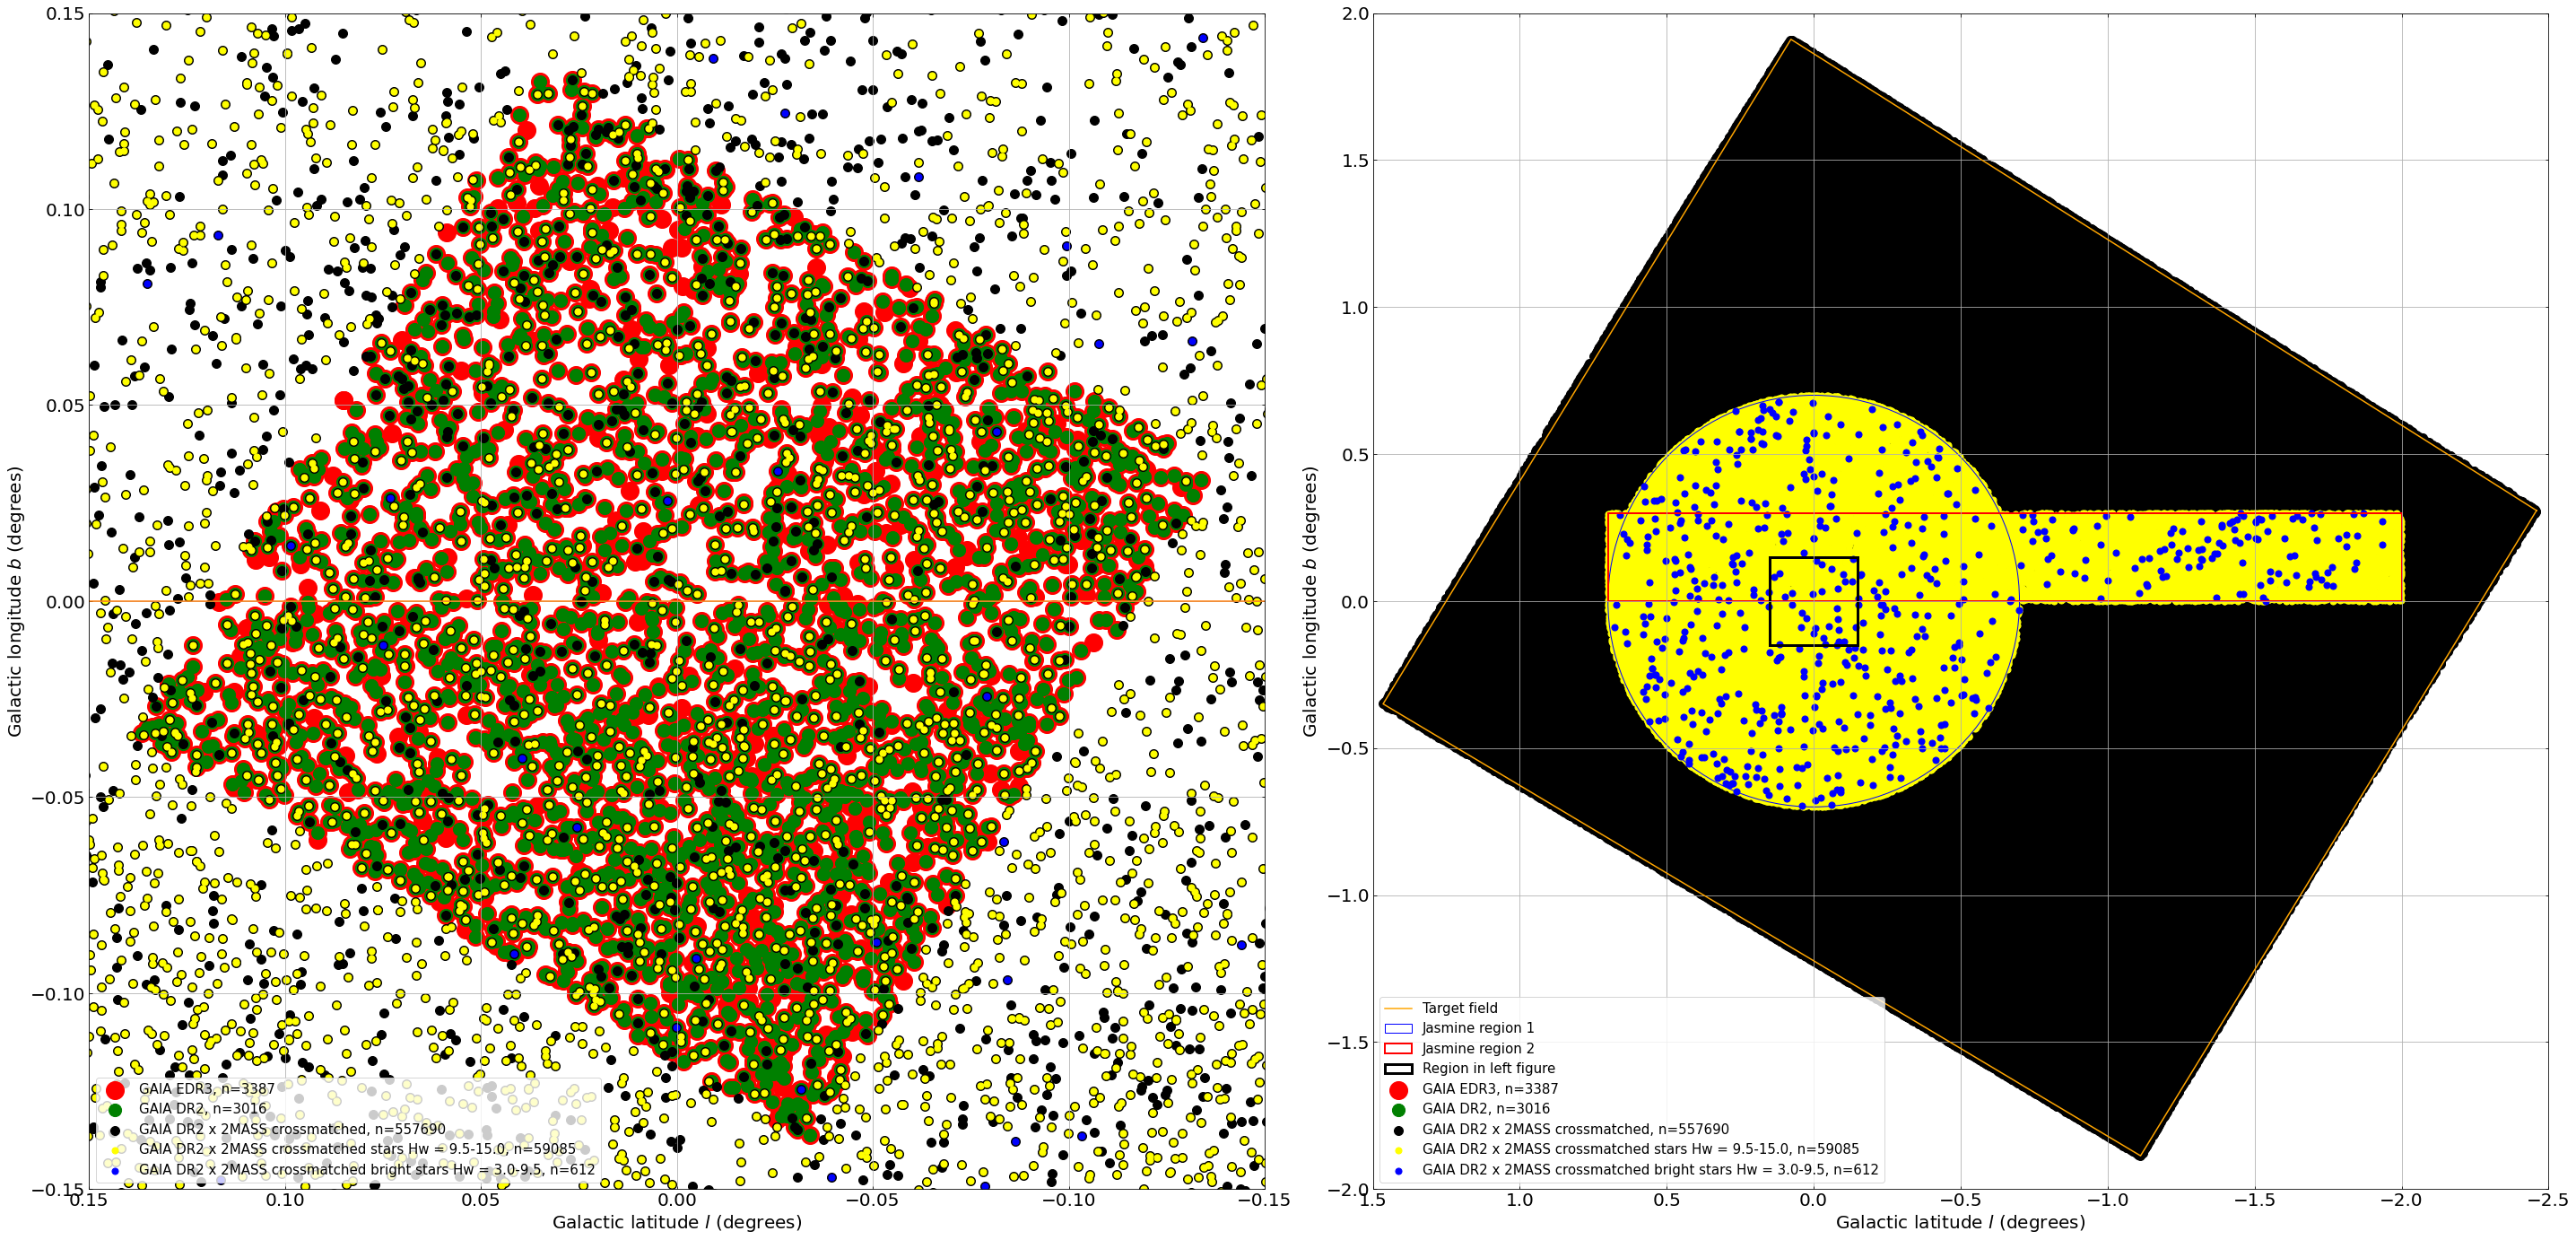

In [78]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.15
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=400, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax1.scatter(pd_gaiadr2["GLON"], pd_gaiadr2["GLAT"], s=200, c="green", label="GAIA DR2, n="+str(len(pd_gaiadr2)))
ax1.scatter(pd_gaia2mass["l"], pd_gaia2mass["b"], s=100, c="black", label="GAIA DR2 x 2MASS crossmatched, n="+str(len(pd_gaia2mass)))
#ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA DR2 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA DR2 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax1.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA DR2 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))

ax2.scatter(pd_gaiaedr3["GLON"], pd_gaiaedr3["GLAT"], s=400, c="red", label="GAIA EDR3, n="+str(len(pd_gaiaedr3)))
ax2.scatter(pd_gaiadr2["GLON"], pd_gaiadr2["GLAT"], s=200, c="green", label="GAIA DR2, n="+str(len(pd_gaiadr2)))
ax2.scatter(pd_gaia2mass["l"], pd_gaia2mass["b"], s=100, c="black", label="GAIA DR2 x 2MASS crossmatched, n="+str(len(pd_gaia2mass)))
#ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=100, c="black", label="GAIA DR2 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_t["l"], pd_gaia2mass_jsky_t["b"], s=50, c="yellow", label="GAIA DR2 x 2MASS crossmatched stars Hw = "+str(min_Hw_t)+"-"+str(max_Hw_t)+", n="+str(len(pd_gaia2mass_jsky_t)))
ax2.scatter(pd_gaia2mass_jsky_b["l"], pd_gaia2mass_jsky_b["b"], s=50, c="blue", label="GAIA DR2 x 2MASS crossmatched bright stars Hw = "+str(min_Hw_b)+"-"+str(max_Hw_b)+", n="+str(len(pd_gaia2mass_jsky_b)))
# ax2.scatter(pd_gaia2mass["ra"]-266.40, pd_gaia2mass["b"]-(-28.95), s=100, c="black", label="GAIA DR2 x 2MASS crossmatched, n="+str(len(pd_gaia2mass_jsky)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb.png")

In [79]:
def make_histogram(x, nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(15,15))
    ax = pp.axes()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.hist(pd_gaia2mass[x], bins=nbin, range=brange, label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.hist(pd_gaia2mass_jsky[x], bins=nbin, range=brange, label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.hist(pd_gaia2mass_t[x], bins=nbin, range=brange, label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.hist(pd_gaia2mass_jsky_t[x], bins=nbin, range=brange, label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.hist(pd_gaia2mass_b[x], bins=nbin, range=brange, label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.hist(pd_gaia2mass_jsky_b[x], bins=nbin, range=brange, label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.hist(pd_gaia2mass_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.hist(pd_gaia2mass_jsky_f[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.hist(pd_gaia2mass_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.hist(pd_gaia2mass_jsky_n[x], bins=nbin, range=brange, label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))
    
    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel("Number of stars", fontsize=20)
    pp.show()
    fig.savefig("histgram.png")

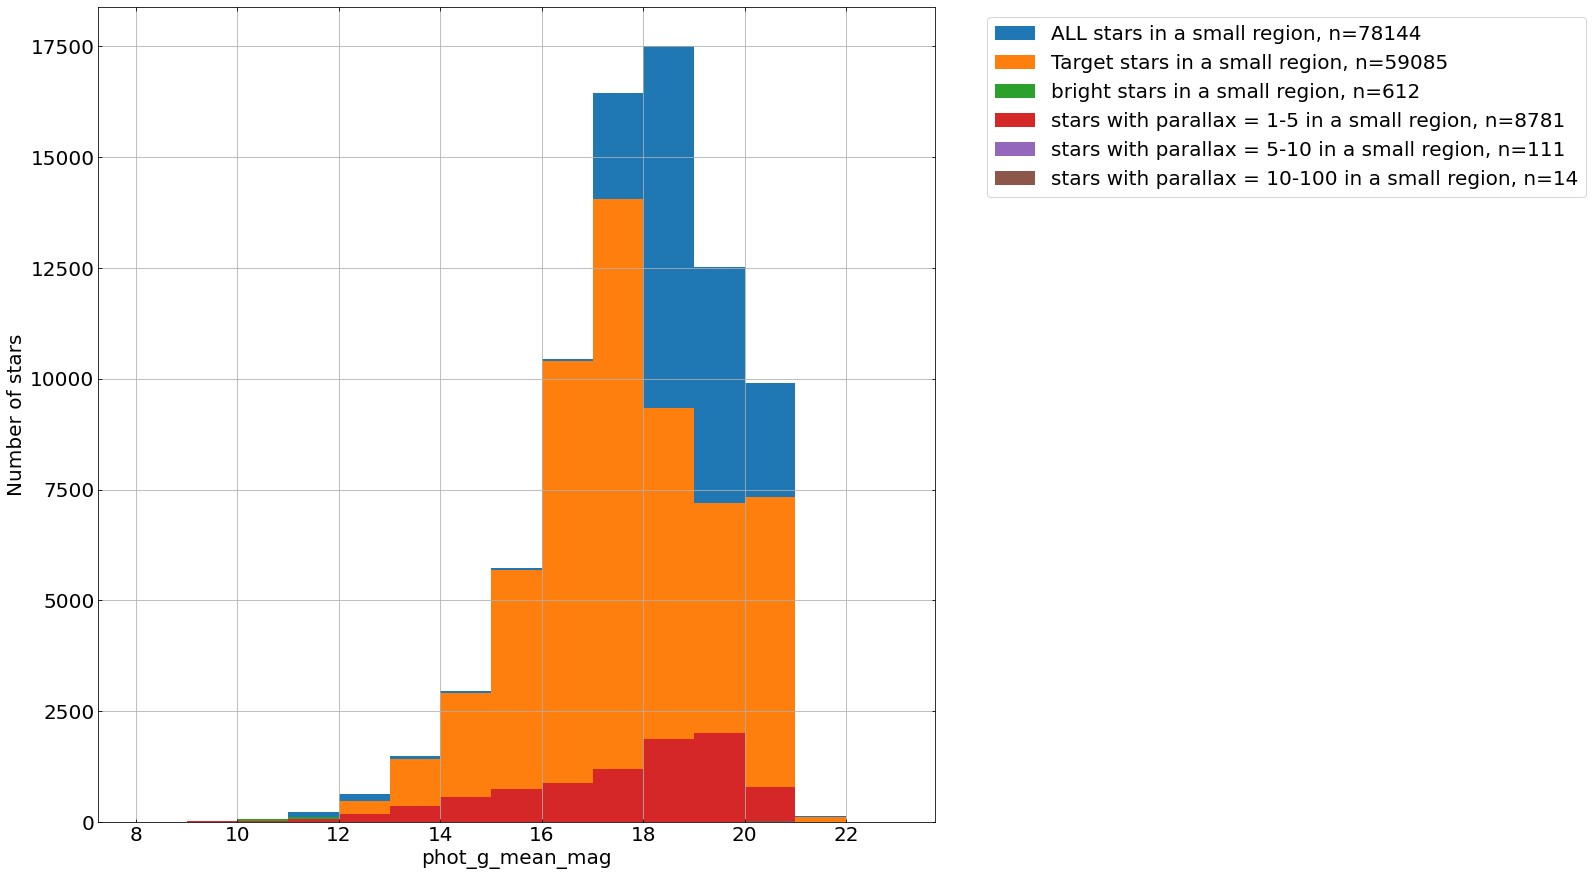

In [80]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 15
brange = (8, 23)
make_histogram("phot_g_mean_mag", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

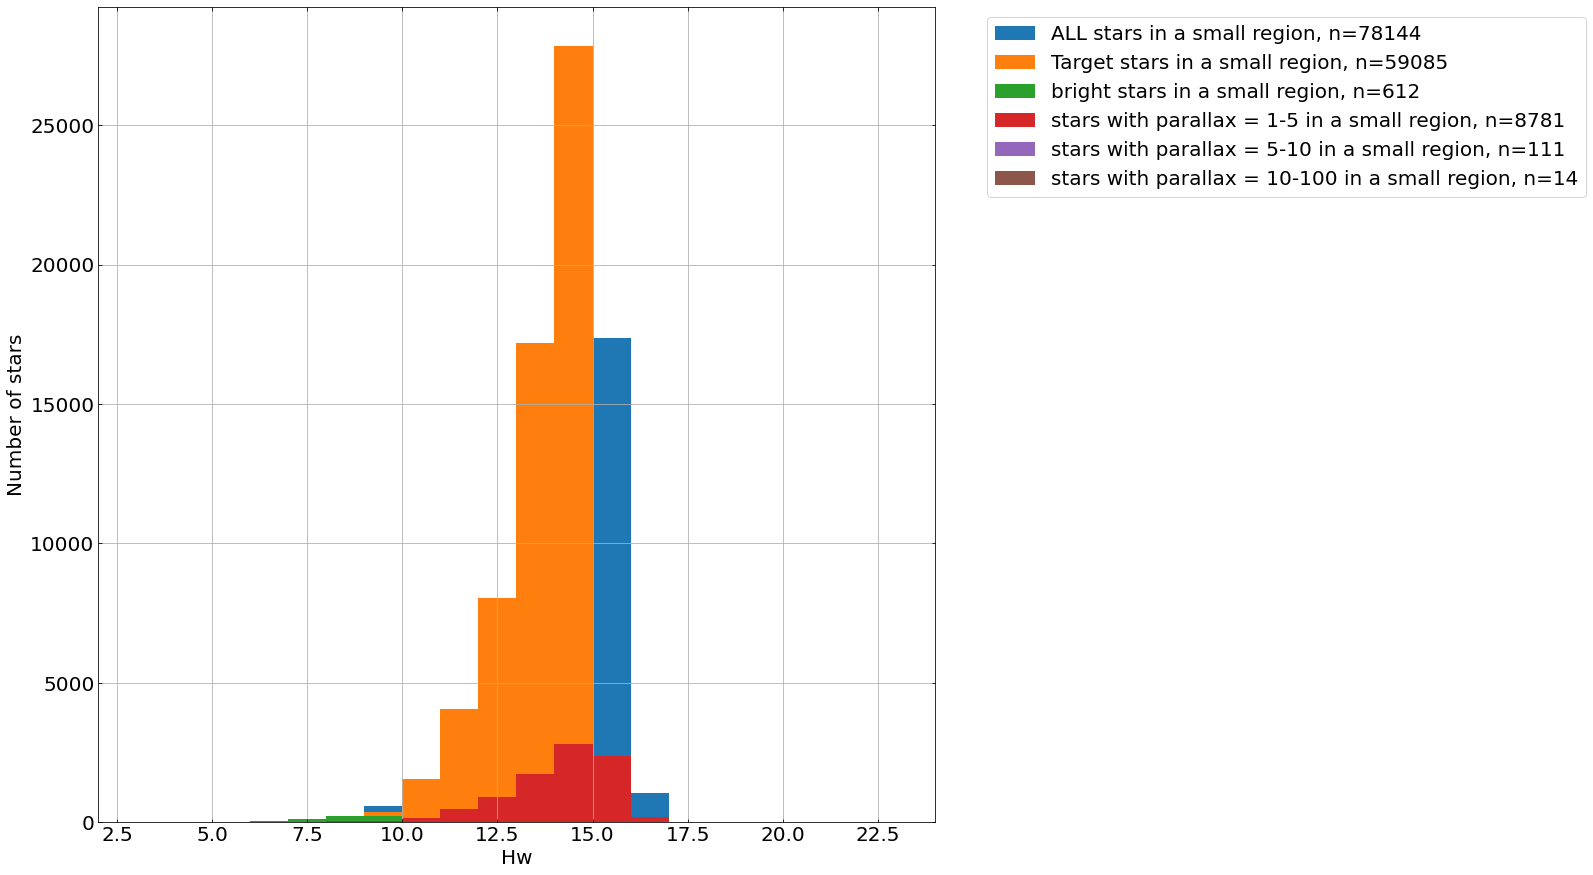

In [81]:
p1 = False   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-5
p8 = True   # stars with parallax = 1-5 in a small region
p9 = False   # stars with parallax = 5-10
p10 = True   # stars with parallax = 5-10 in a small region
p11 = False   # stars with parallax = 10-100
p12 = True   # stars with parallax = 10-100 in a small region
nbin = 20
brange = (3, 23)
make_histogram("Hw", nbin, brange, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

In [82]:
def make_figure(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    fig = pp.figure(figsize=(20,20))
    ax = pp.axes()
    ax.invert_yaxis()
    pp.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    pp.grid(True)

    if p1: pp.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: pp.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: pp.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: pp.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: pp.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: pp.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: pp.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: pp.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: pp.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: pp.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: pp.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: pp.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    if x == "bp_rp" and y == "Mg": pp.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    pp.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=20)
    pp.xlabel(x, fontsize=20)
    pp.ylabel(y, fontsize=20)
    pp.show()
    fig.savefig("plot.png")

In [83]:
def make_figure1(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12):
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    from astropy.table import QTable

    import numpy as np
    import matplotlib.pyplot as pp
    import matplotlib.patches as patches
    from matplotlib import gridspec

    region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
    region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

    ####

    lcenter = -0.5
    bcenter = 0
    ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
    sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
    width = 3
    height = 3
    sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
        [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

    sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
    sky1_l = sky1_radec.galactic.l.degree
    sky1_b = sky1_radec.galactic.b.degree
    sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

    fig = pp.figure(figsize=(30,15))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(2,4,3)

    ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax1.grid(True)
    # ax1.set_aspect('equal')
    ax1.invert_yaxis()

    if p1: ax1.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax1.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax1.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax1.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax1.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax1.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: ax1.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: ax1.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: ax1.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: ax1.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: ax1.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: ax1.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))
    
    if x == "bp_rp" and y == "Mg": 
        print("The Sun")
        ax1.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    if x == "distance" : ax1.set_xscale("log")
    if y == "distance" : ax1.set_yscale("log")

    ax1.legend(bbox_to_anchor=(1.04, 0.22), loc='upper left', fontsize=15)
    #ax1.legend(loc='upper right', fontsize=15)
    ax1.set_xlabel(x, fontsize=20)
    ax1.set_ylabel(y, fontsize=20)

    ###

    ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.set_xlim(1.5,-2.5)
    ax2.set_ylim(-2,2)
    ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
    ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

    r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
    ax2.add_patch(r1)
    r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
    ax2.add_patch(r2)
    ax2.plot(sky1_l, sky1_b, "orange", label="Target field")
    
    x = "l"
    y = "b"
    if p1: ax2.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax2.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax2.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax2.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax2.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax2.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: ax2.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p8: ax2.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p9: ax2.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p10: ax2.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p11: ax2.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p12: ax2.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    ax2.legend(loc="lower left", fontsize=15)
    ax2.legend(bbox_to_anchor=(-0.1525, -0.1), loc='upper left', fontsize=15)
    
    fig.subplots_adjust(left=0.035, right=0.98, bottom=0.05, top=0.98, wspace=0.15)

    #fig.tight_layout()
    pp.show()

    fig.savefig("plot.png")
 

The Sun


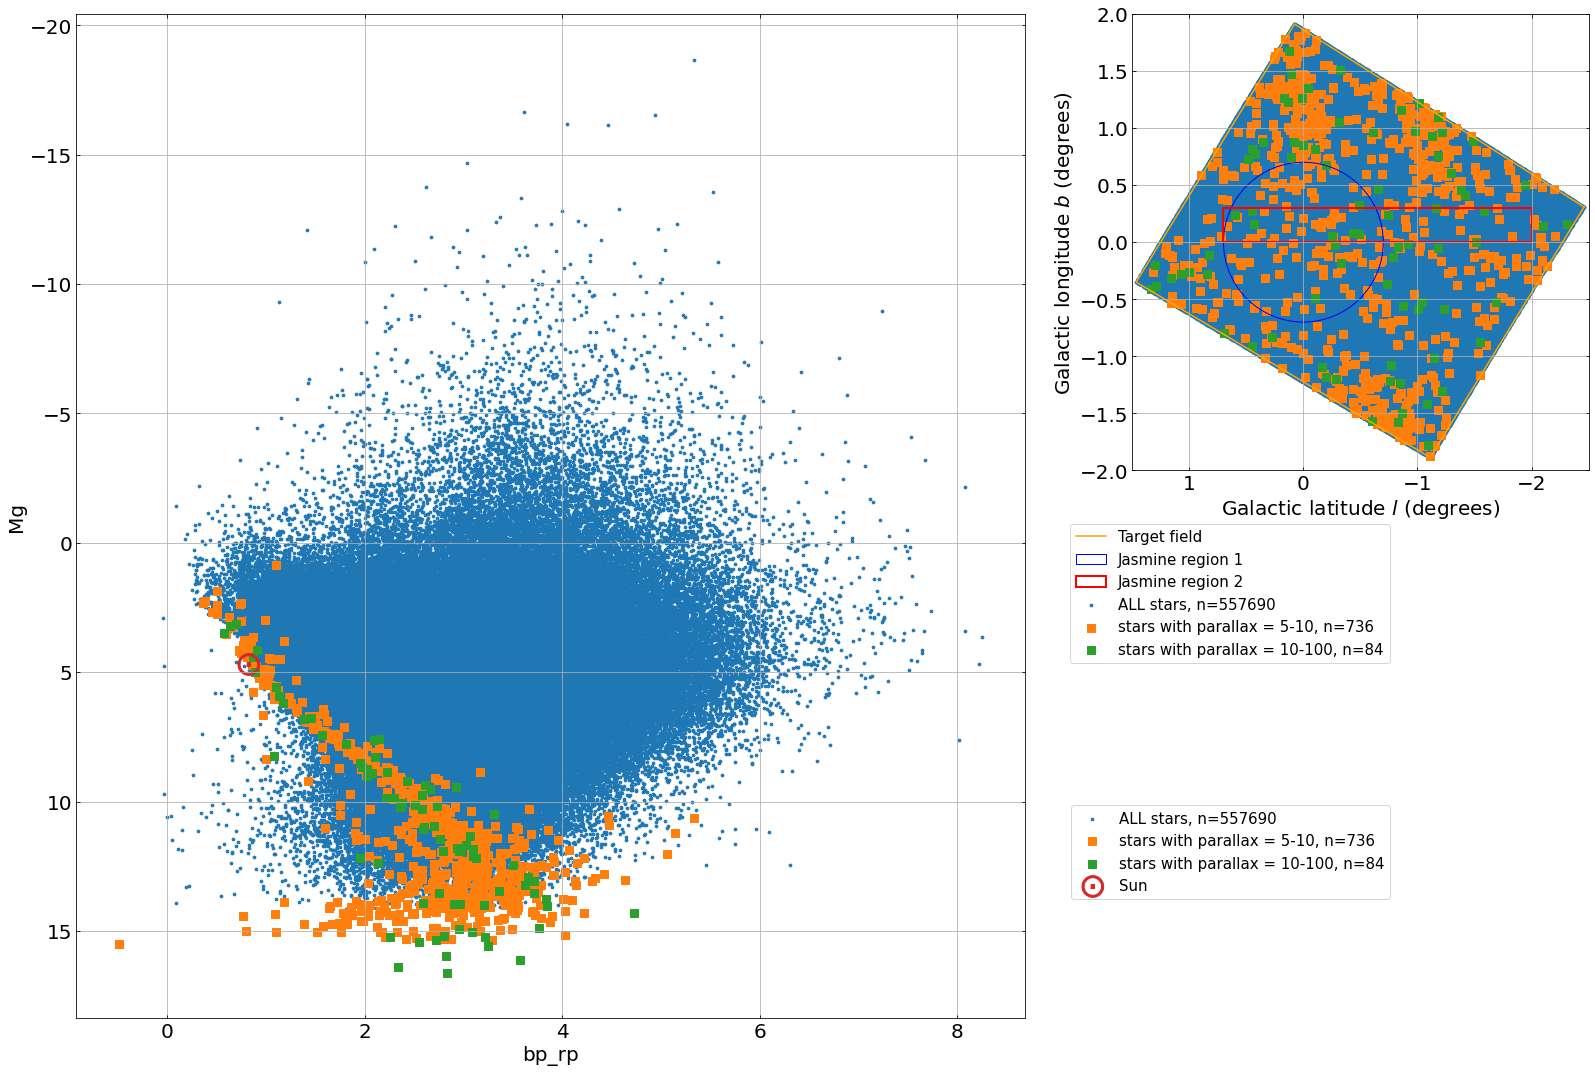

In [84]:
p1 = True   # ALL stars
p2 = False  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

The Sun


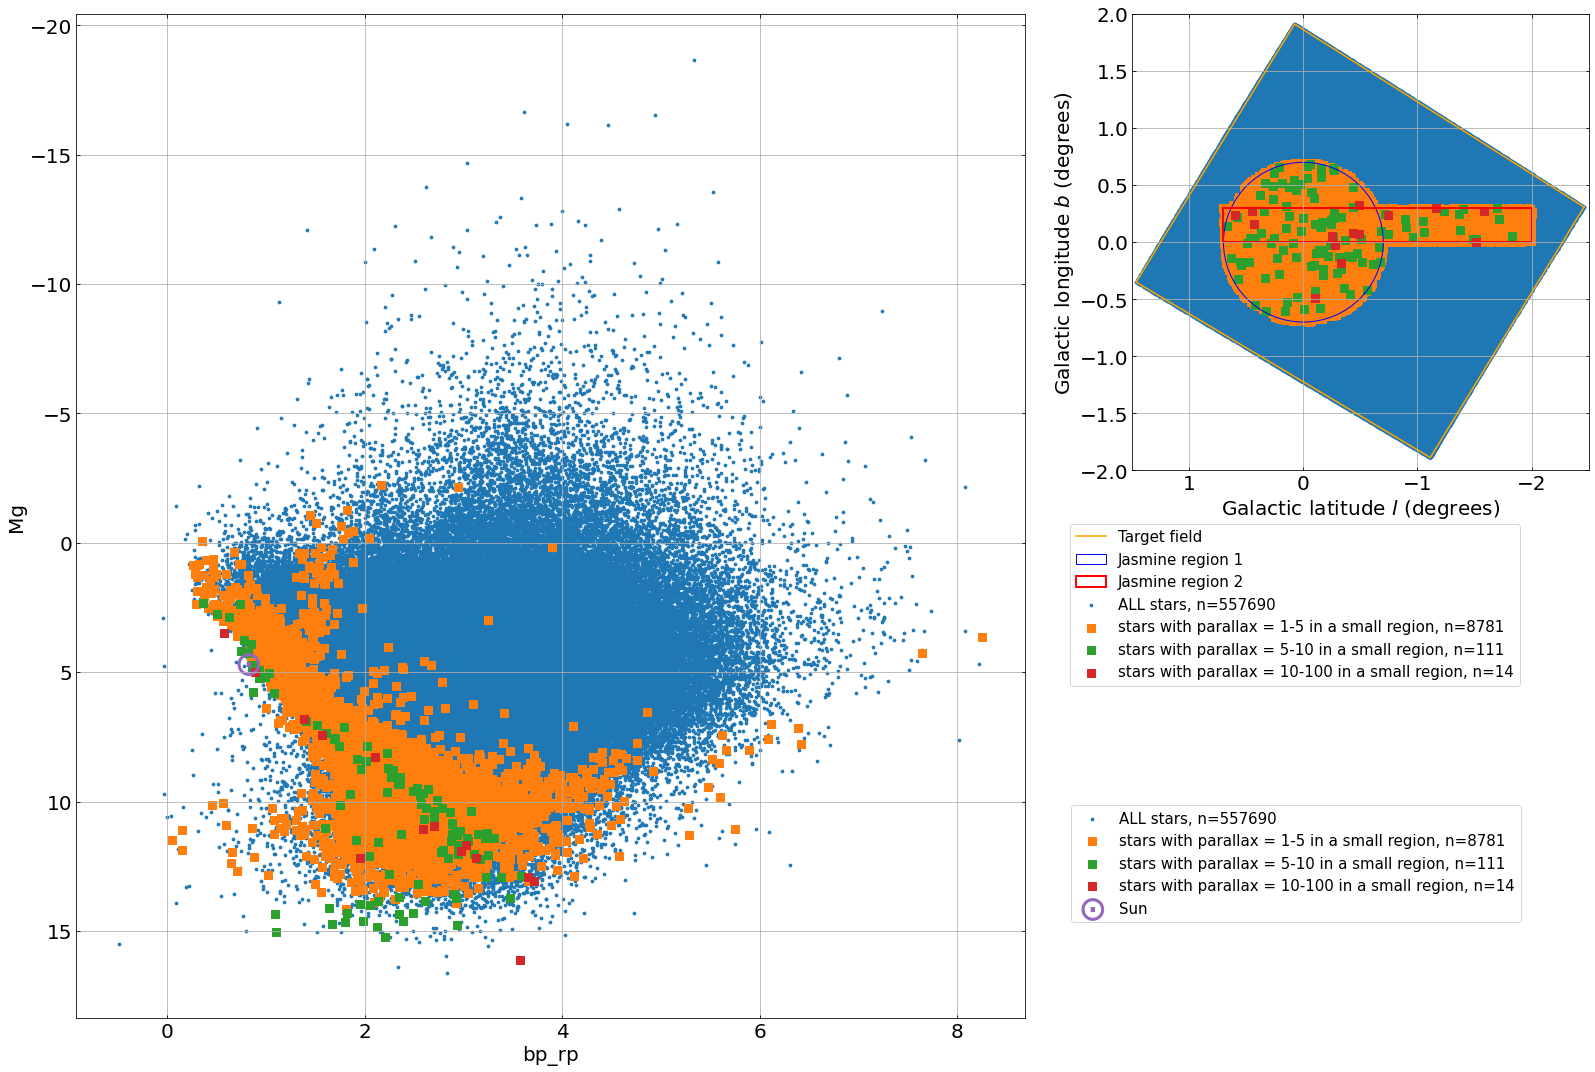

In [85]:
p1 = True   # ALL stars
p2 = False  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

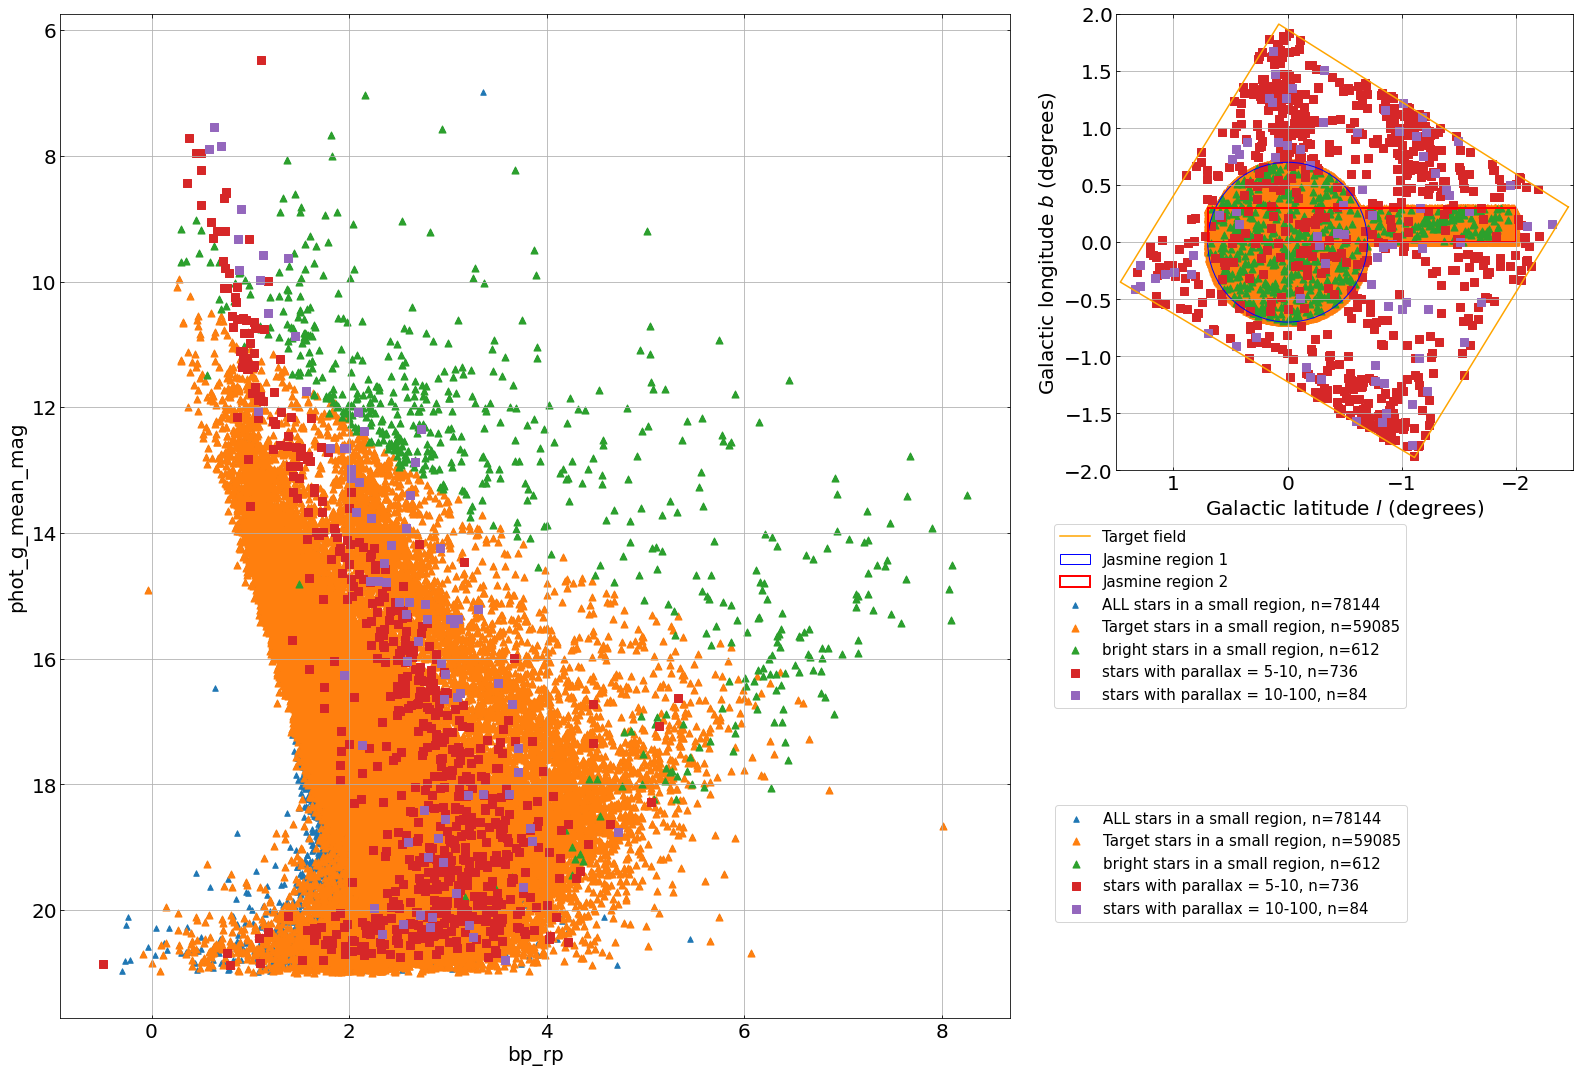

In [86]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

The Sun


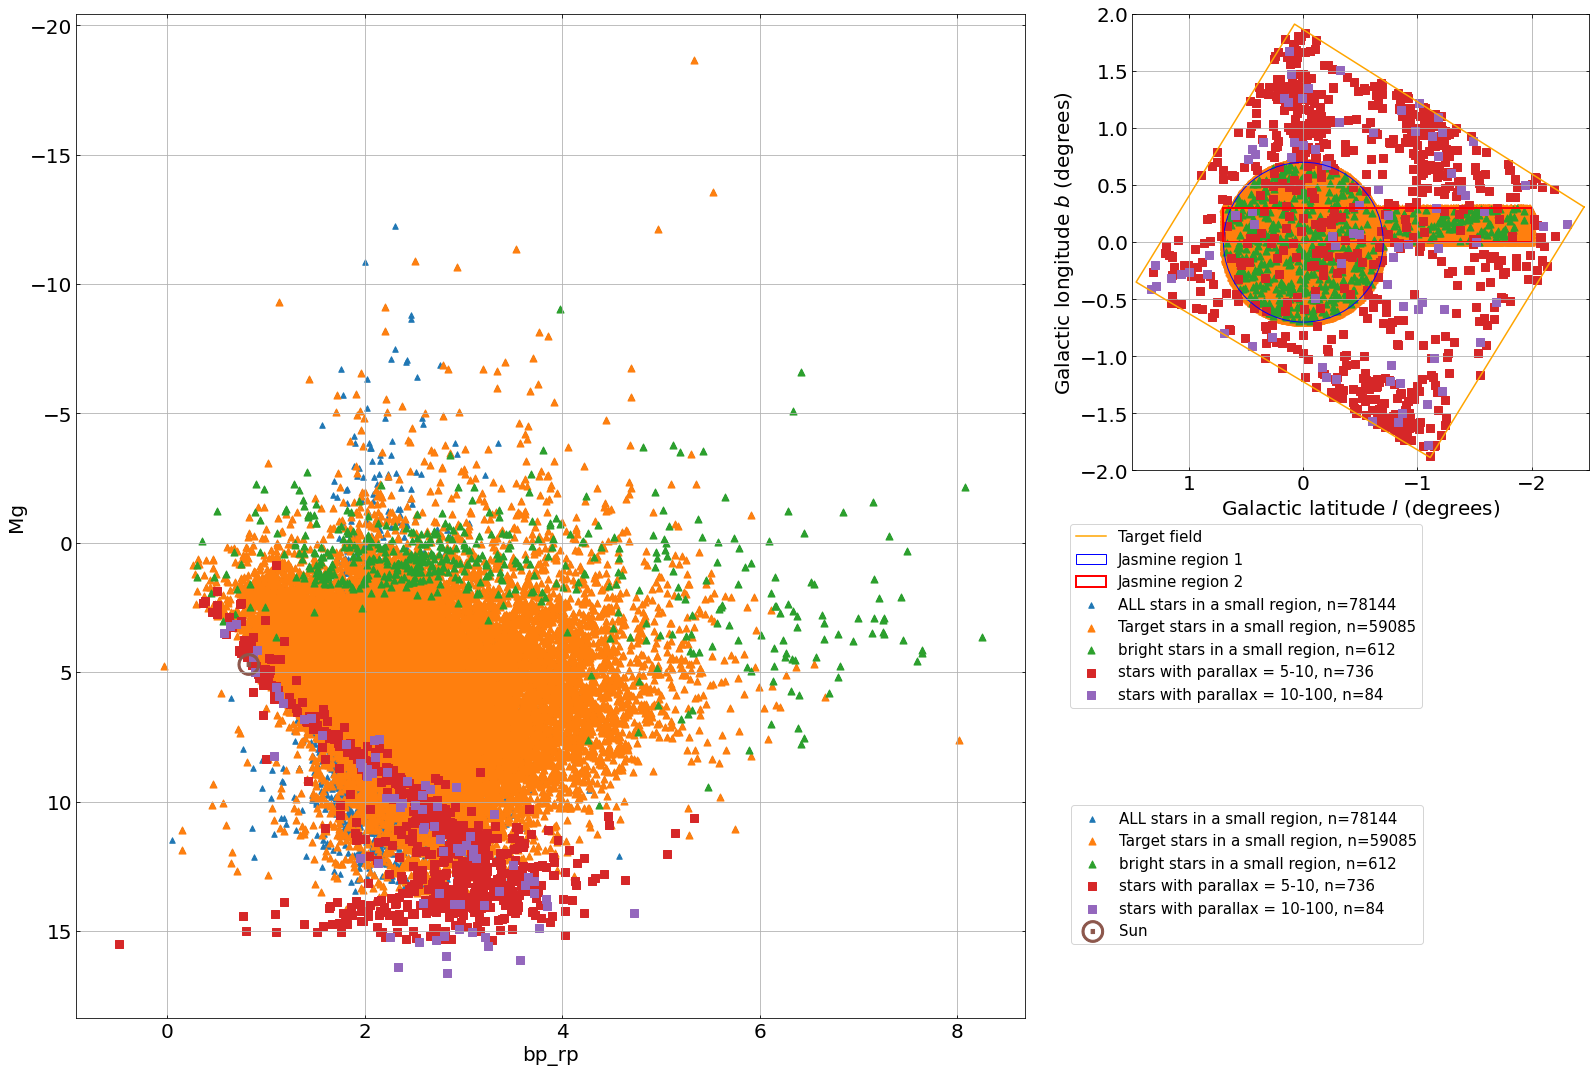

In [87]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

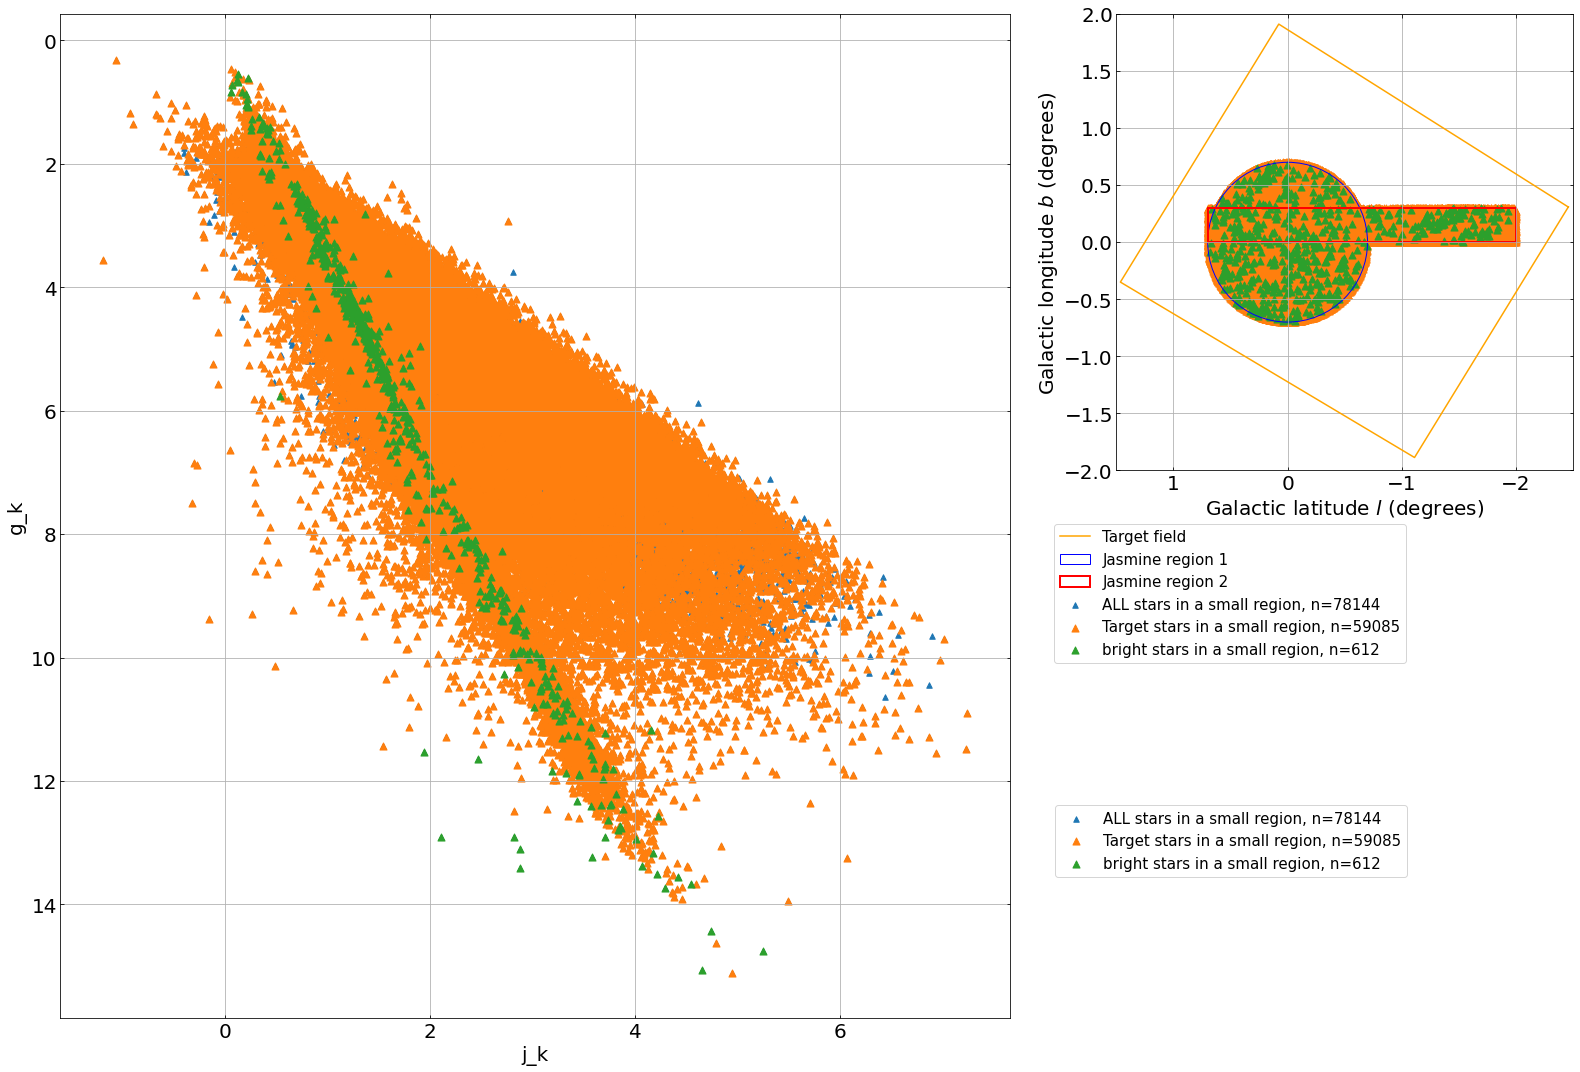

In [88]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("j_k", "g_k", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

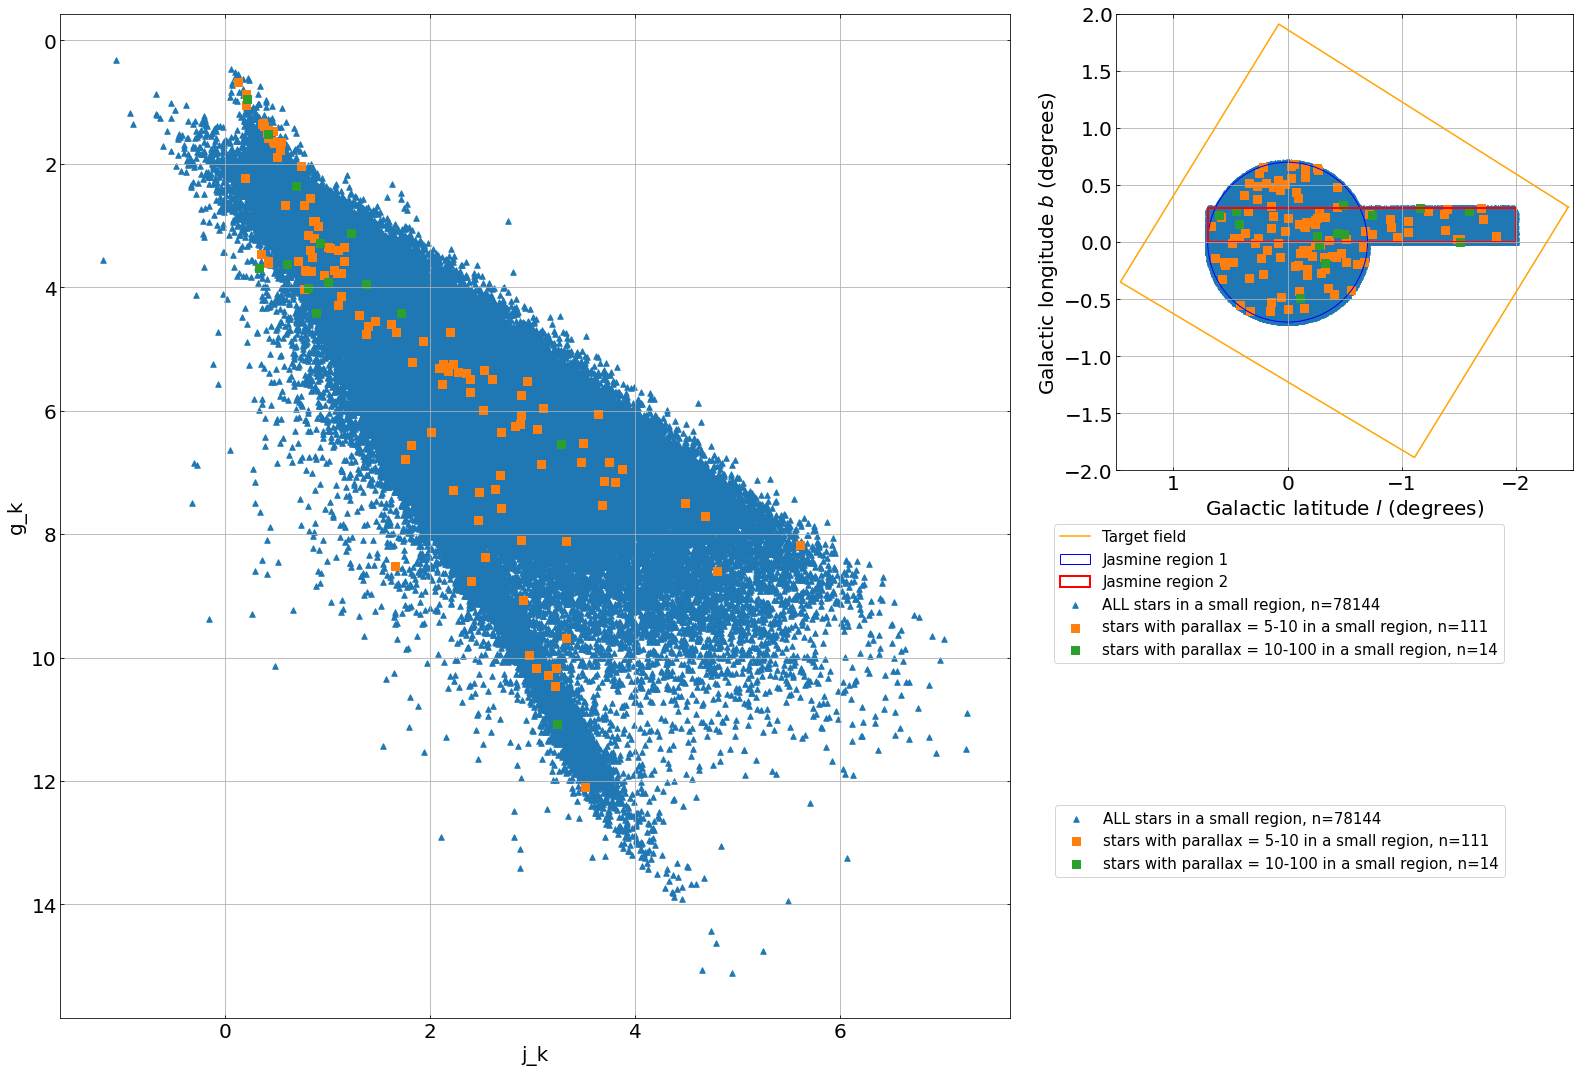

In [89]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = False  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = False  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "g_k", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

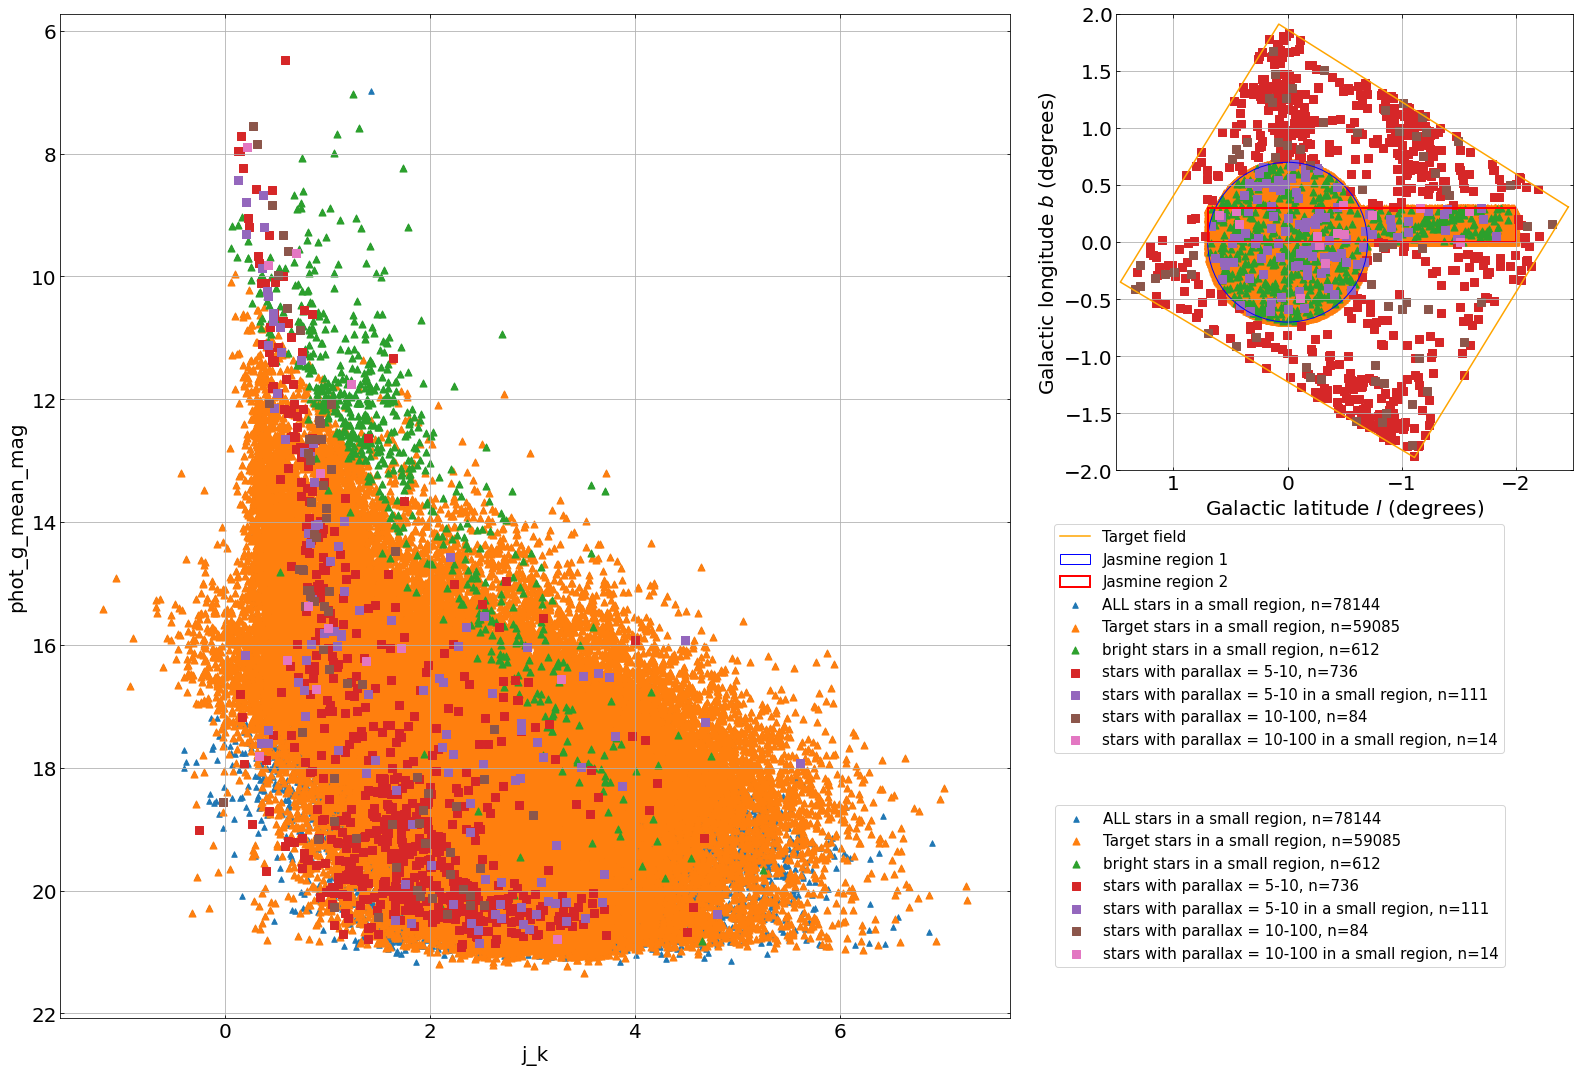

In [90]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

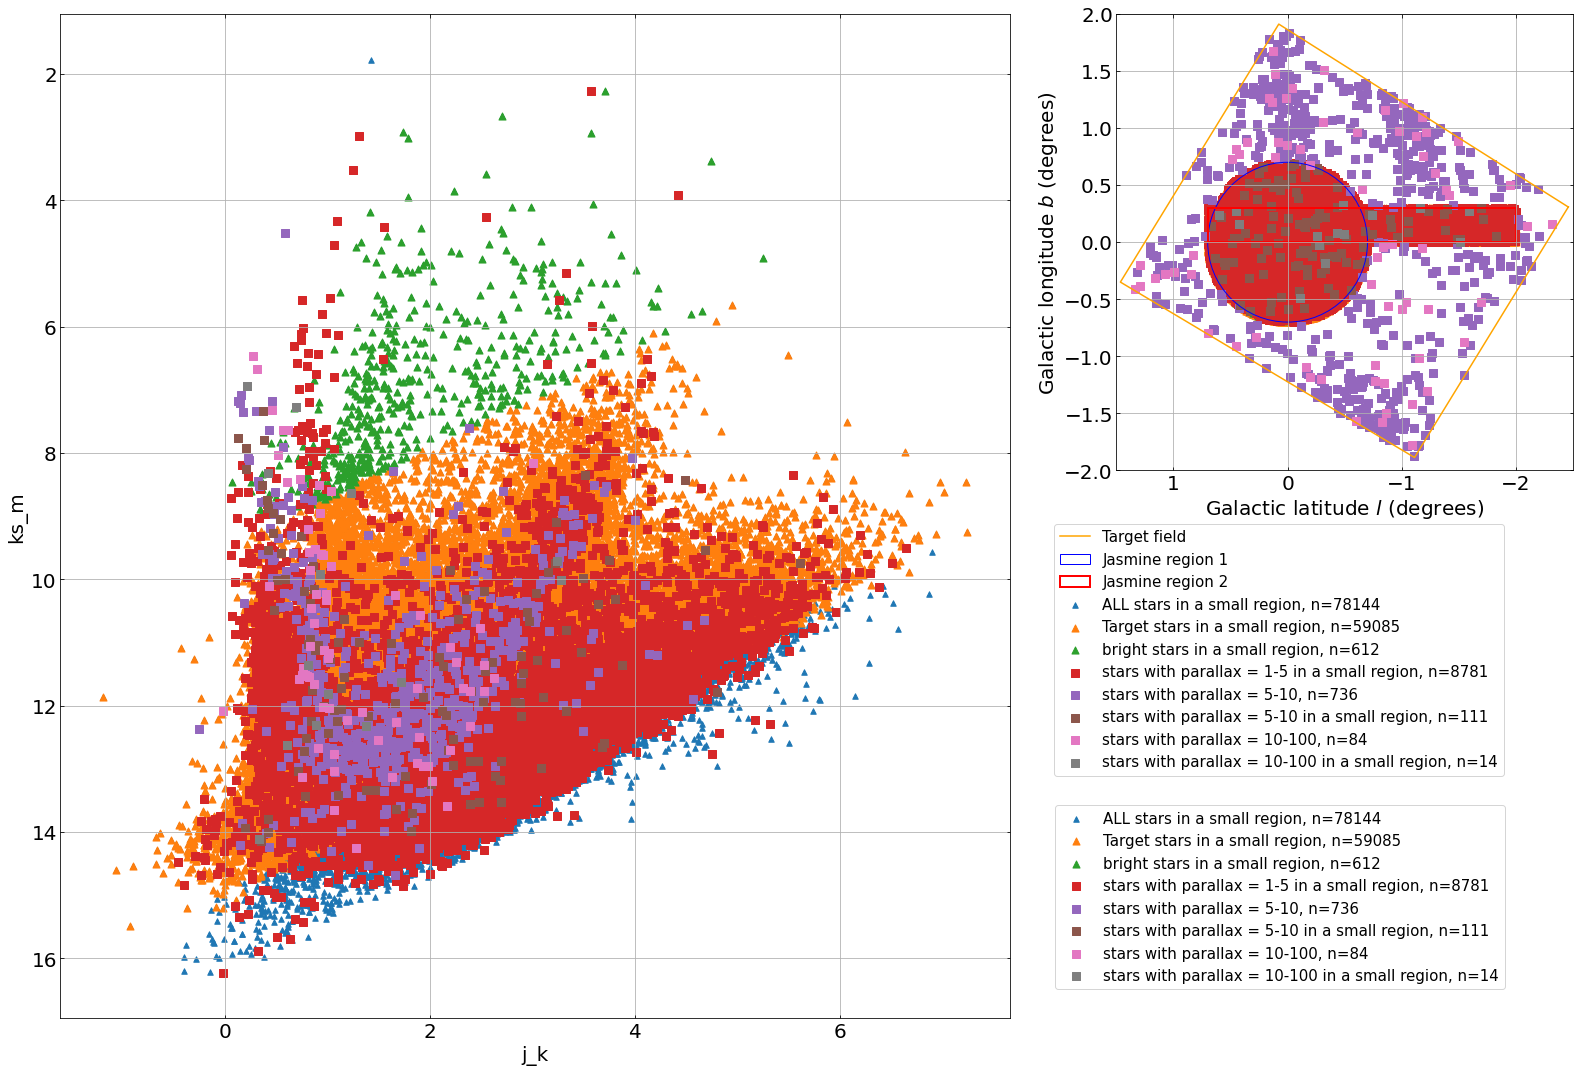

In [91]:
p1 = False   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = True  # stars with parallax = 5-10
p10 = True # stars with parallax = 15-10 in a small region
p11 = True  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("j_k", "ks_m", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

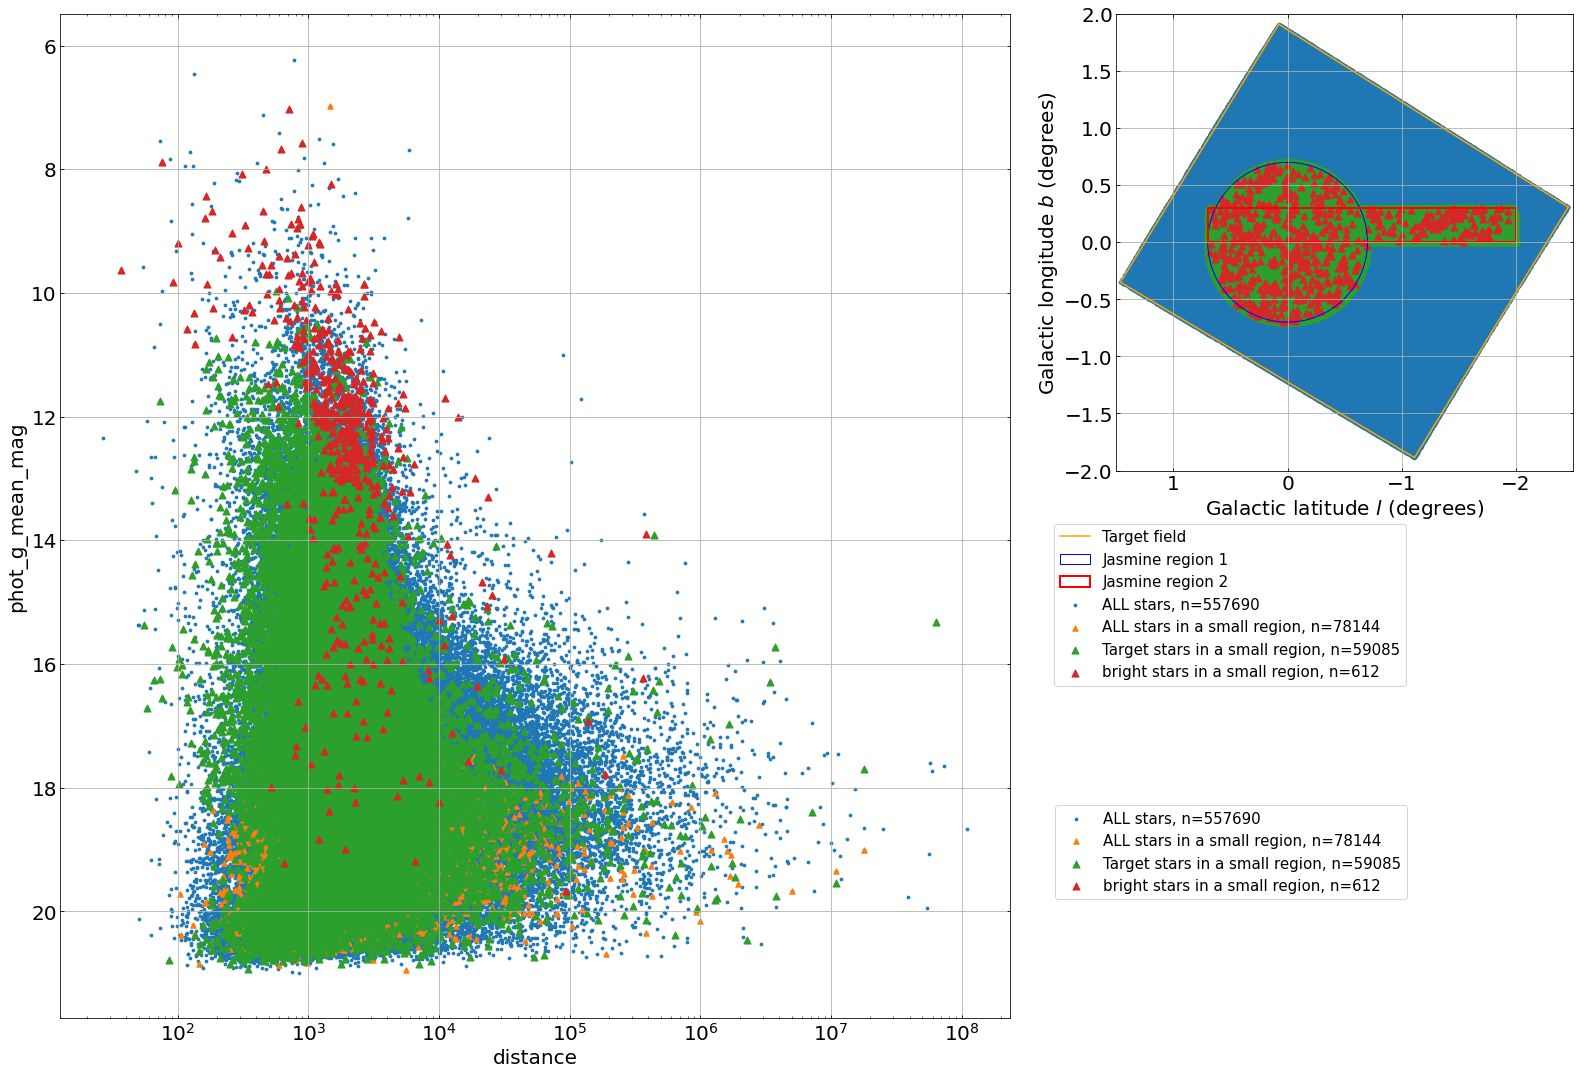

In [92]:
p1 = True   # ALL stars
p2 = True  # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("distance", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

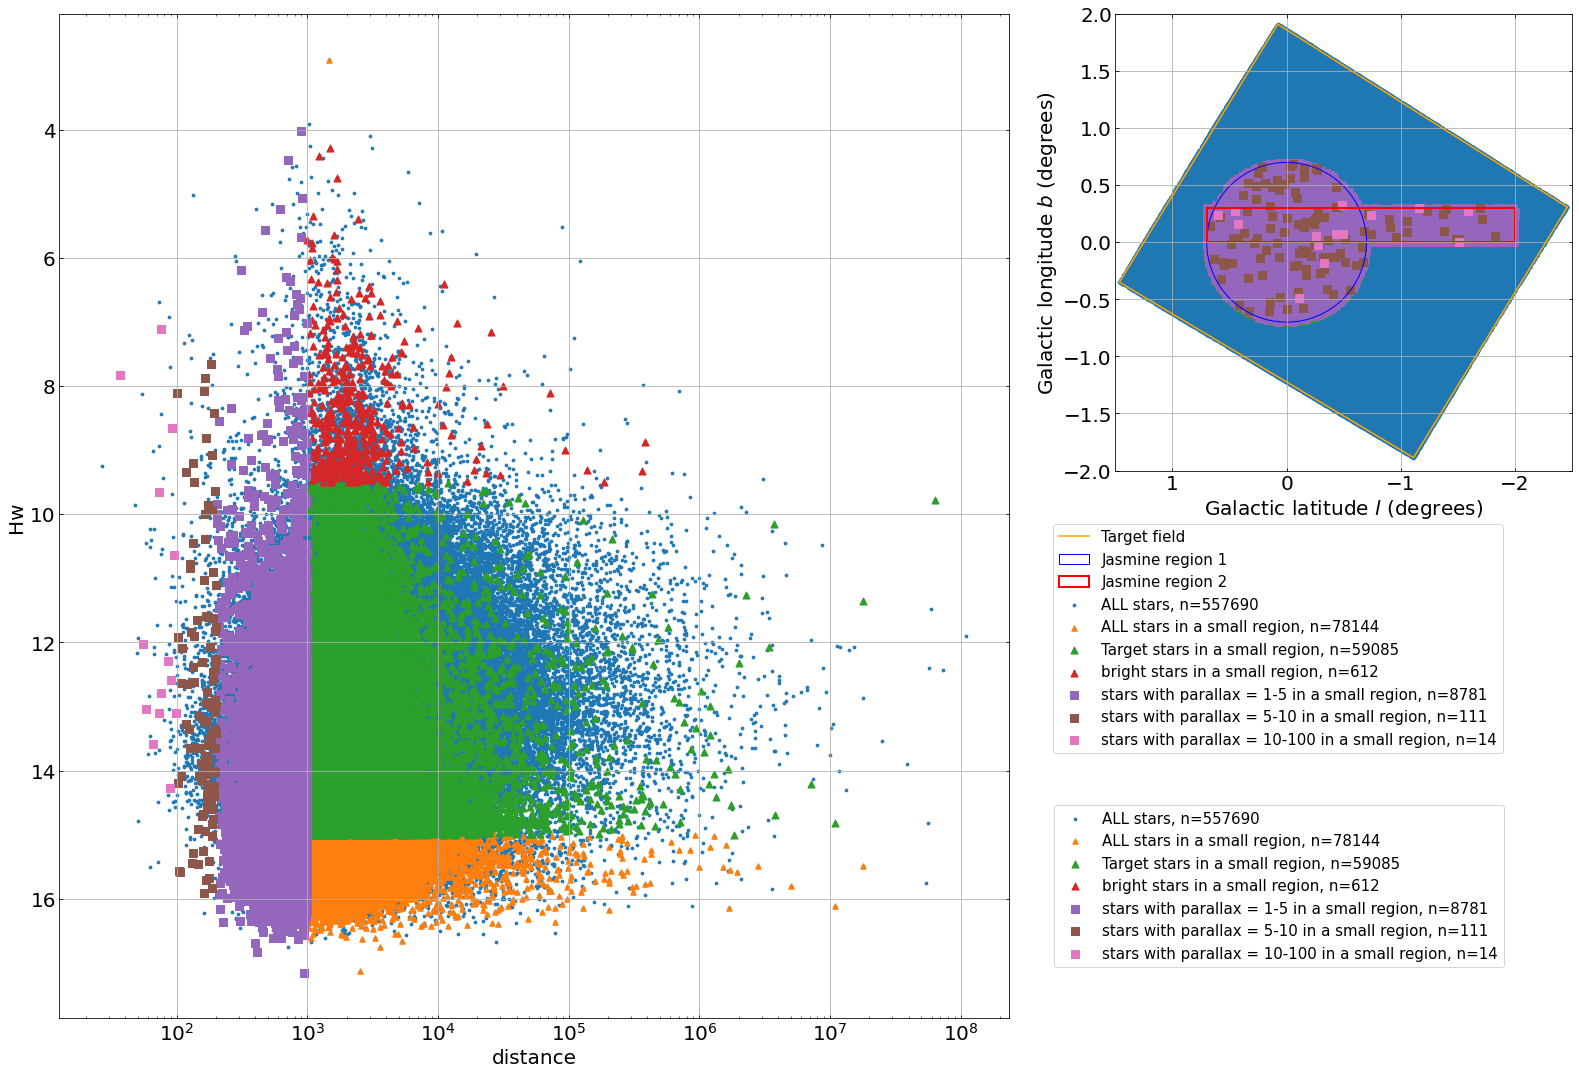

In [93]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-10
p8 = True   # stars with parallax = 1-10 in a small region
p9 = False   # stars with parallax = 10-100
p10 = True  # stars with parallax = 10-100 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("distance", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

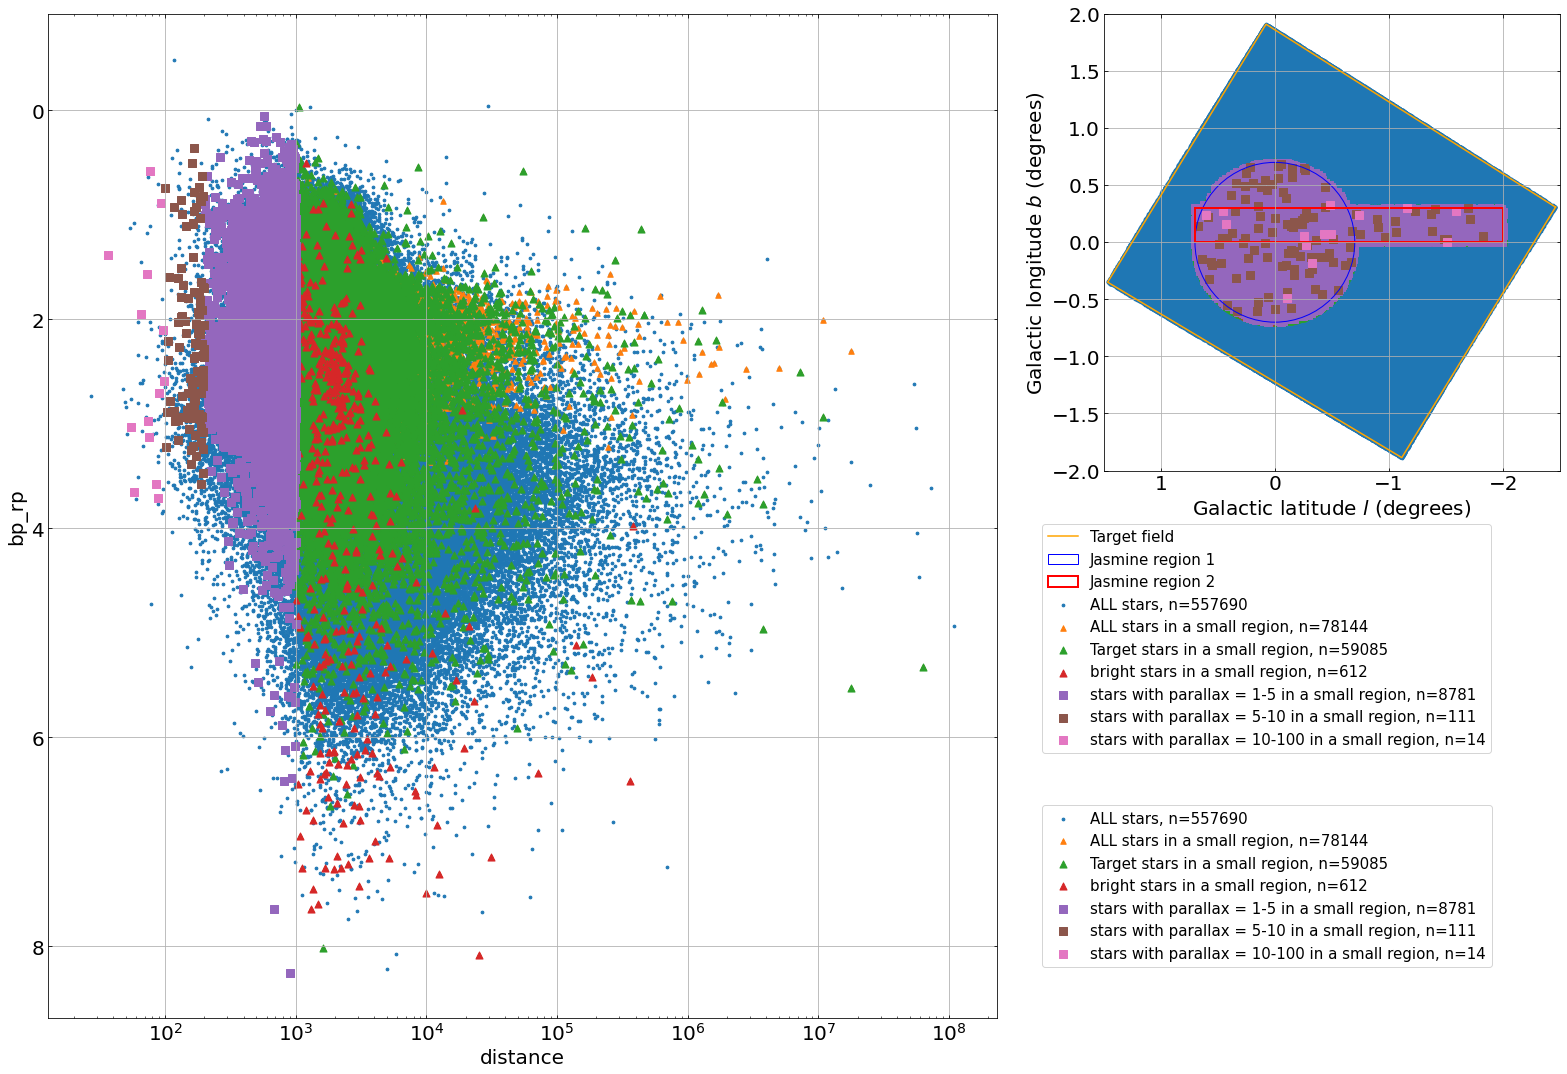

In [94]:
p1 = True   # ALL stars
p2 = True   # ALL stars in a small region
p3 = False   # Target stars in a whole region
p4 = True   # Target stars in a small region
p5 = False   # bright stars in a whole region
p6 = True   # bright stars in a small region
p7 = False   # stars with parallax = 1-10
p8 = True   # stars with parallax = 1-10 in a small region
p9 = False   # stars with parallax = 10-100
p10 = True  # stars with parallax = 10-100 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("distance", "bp_rp", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

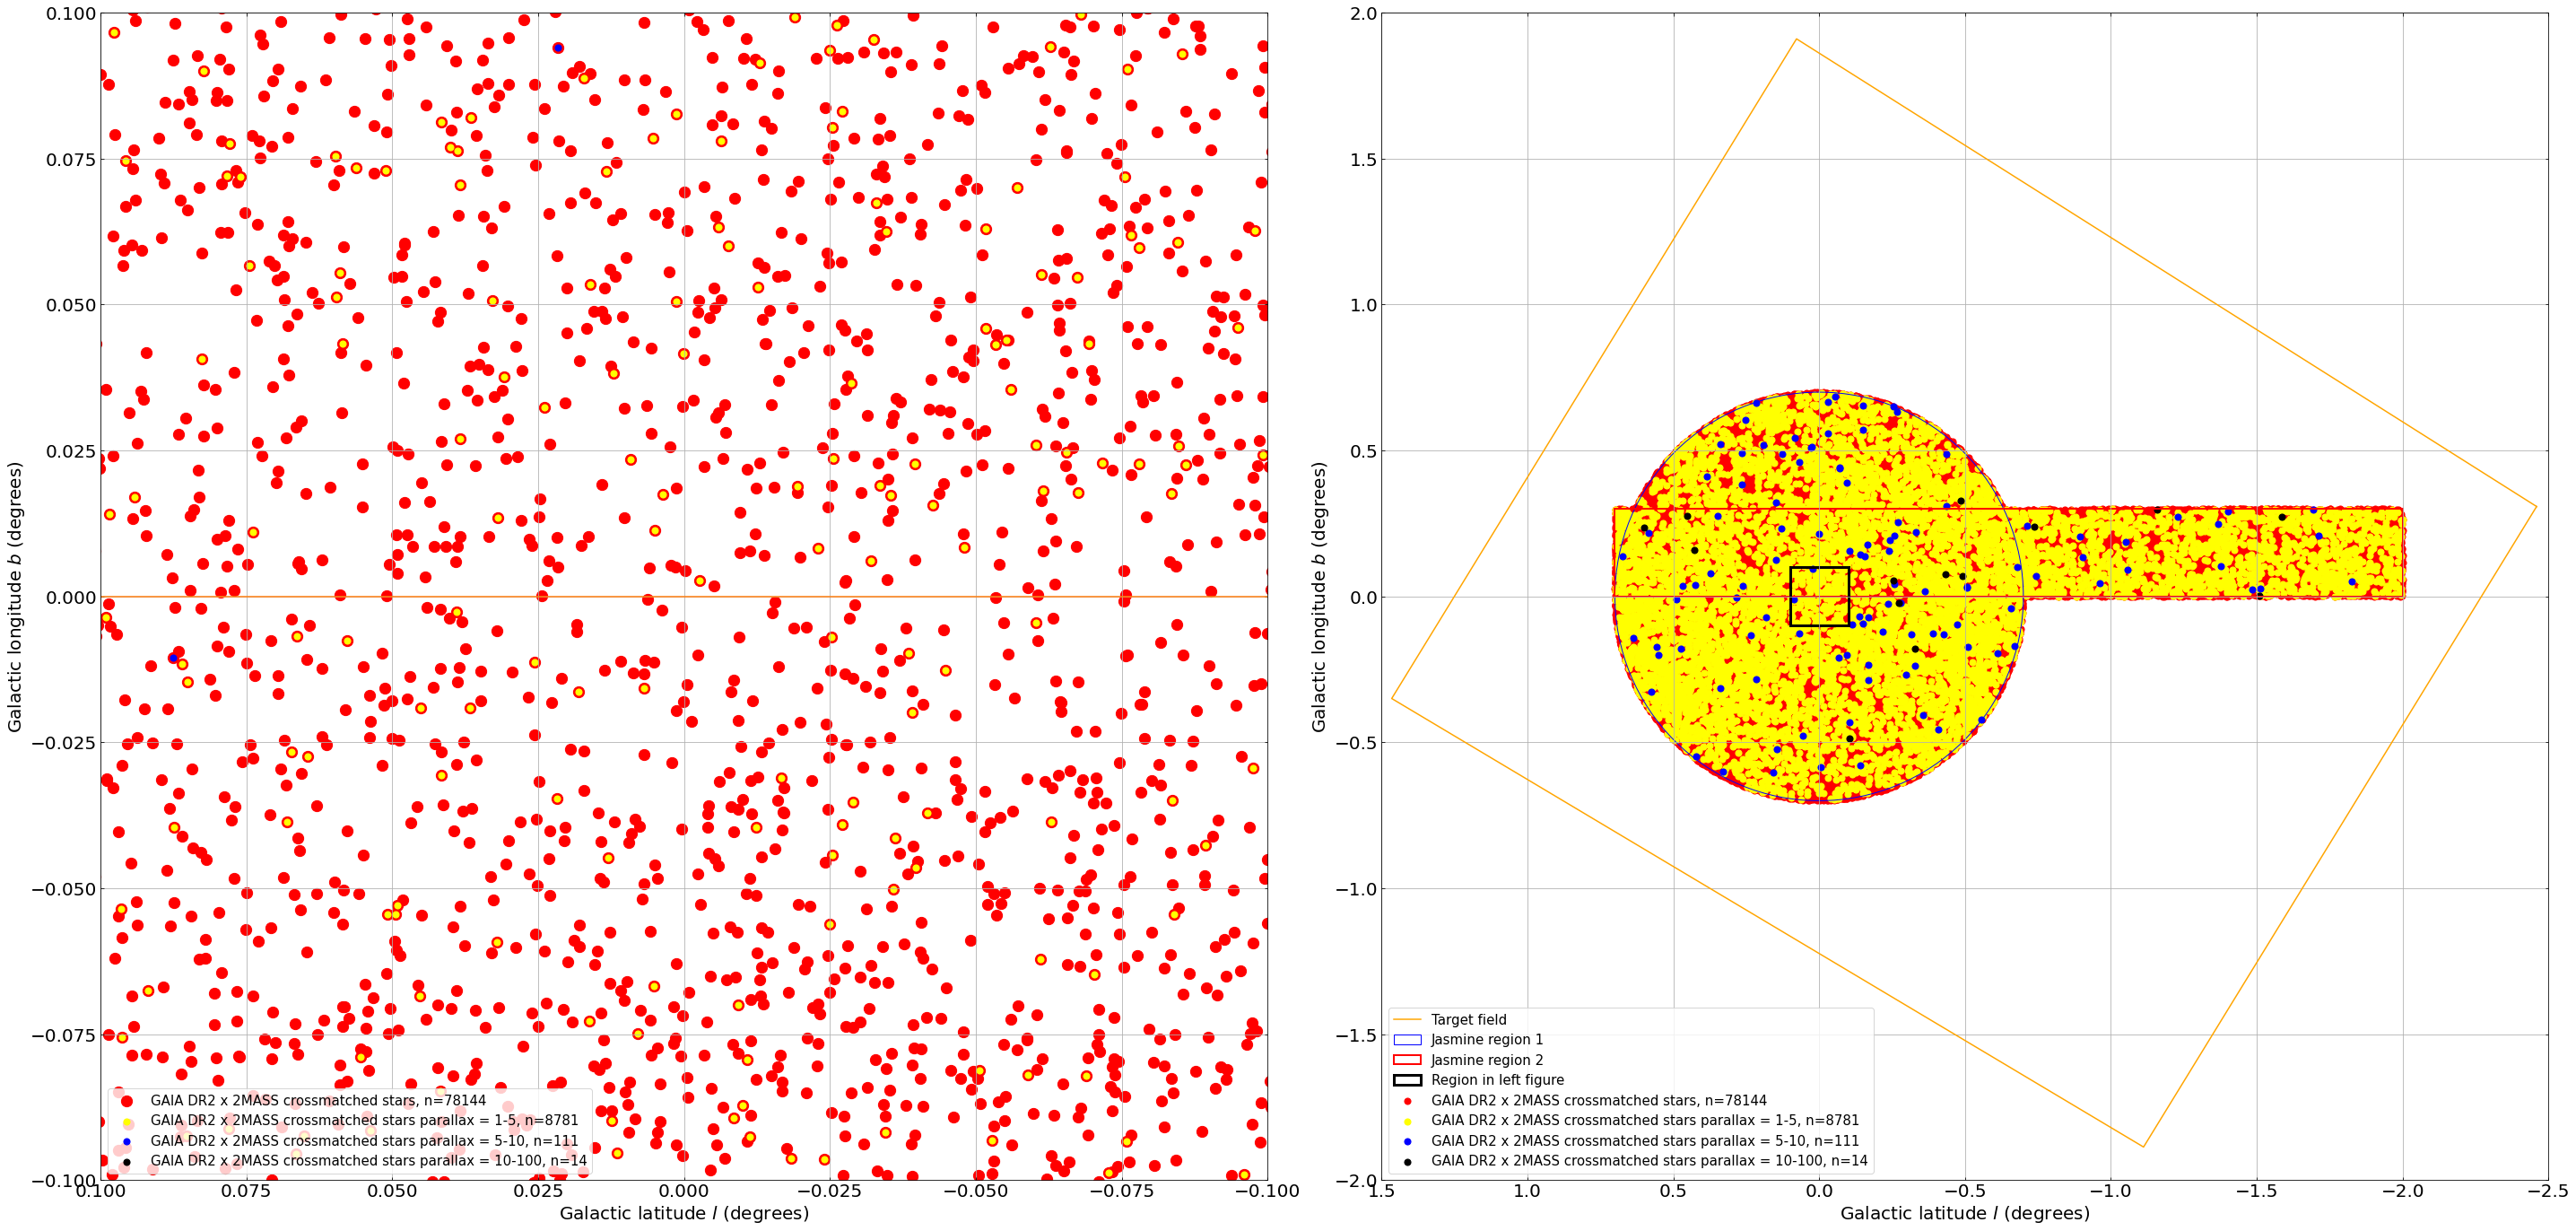

In [95]:
from astropy.coordinates import SkyCoord
from astropy.table import QTable

import numpy as np
import matplotlib.pyplot as pp
import matplotlib.patches as patches

region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

lcenter = -0.5
bcenter = 0
ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
width = 3
height = 3
sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
    [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
sky1_l = sky1_radec.galactic.l.degree
sky1_b = sky1_radec.galactic.b.degree
sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

####

fig = pp.figure(figsize=(40,20))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax1.grid(True)
ax1.set_aspect('equal')

drange=0.1
ax1.set_xlim(drange,-drange)
ax1.set_ylim(-drange,drange)
ax1.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax1.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r2 = patches.Circle(xy=(0,0), radius=0.7, fill=False)
ax1.add_patch(r2)
ax1.plot(region1[0],region1[1])
ax1.plot(region2[0],region2[1])
ax1.plot(sky1_l, sky1_b)

ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
ax2.grid(True)
ax2.set_aspect('equal')
ax2.set_xlim(1.5,-2.5)
ax2.set_ylim(-2,2)
ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
ax2.add_patch(r1)
r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
ax2.add_patch(r2)
ax2.plot(sky1_l, sky1_b, "orange", label="Target field")

###
ax1.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=150, c="red", label="GAIA DR2 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax1.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax1.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax1.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))

ax2.scatter(pd_gaia2mass_jsky["l"], pd_gaia2mass_jsky["b"], s=50, c="red", label="GAIA DR2 x 2MASS crossmatched stars, n="+str(len(pd_gaia2mass_jsky)))
ax2.scatter(pd_gaia2mass_jsky_f["l"], pd_gaia2mass_jsky_f["b"], s=50, c="yellow", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_jsky_f)))
ax2.scatter(pd_gaia2mass_jsky_n["l"], pd_gaia2mass_jsky_n["b"], s=50, c="blue", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_jsky_n)))
ax2.scatter(pd_gaia2mass_jsky_m["l"], pd_gaia2mass_jsky_m["b"], s=50, c="black", label="GAIA DR2 x 2MASS crossmatched stars parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_jsky_m)))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
#fig.savefig("fov_lb.png"))))
###

zr = patches.Rectangle(xy=(-drange,-drange), height=drange*2, width=drange*2, fill=False, color="black", lw=3, label="Region in left figure")
ax2.add_patch(zr)

ax1.legend(loc="lower left", fontsize=15)
ax2.legend(loc="lower left", fontsize=15)

fig.tight_layout()
pp.show()
fig.savefig("fov_lb.png")

In [96]:
pd_gaia2mass_jsky_m

solution_id                   designation  \
9419    1635721458409799680  Gaia DR2 4057277350545375616   
36740   1635721458409799680  Gaia DR2 4056967490090373760   
109861  1635721458409799680  Gaia DR2 4057072188510525312   
115376  1635721458409799680  Gaia DR2 4057095072096565632   
115636  1635721458409799680  Gaia DR2 4057087031913813376   
117719  1635721458409799680  Gaia DR2 4057096446482441088   
120474  1635721458409799680  Gaia DR2 4057104688524235136   
120840  1635721458409799680  Gaia DR2 4057103902549306752   
123939  1635721458409799680  Gaia DR2 4057146985361182464   
293768  1635721458409799680  Gaia DR2 4056929217651884928   
298204  1635721458409799680  Gaia DR2 4056936566324422784   
306058  1635721458409799680  Gaia DR2 4057573802035360896   
306592  1635721458409799680  Gaia DR2 4057569236490414208   
307964  1635721458409799680  Gaia DR2 4057581743434796416   

                  source_id  random_index  ref_epoch          ra  ra_error  \
9419    4057277350545375616    1096312189     2015.5  266.819413  0.071298   
36740   4056967490090373760    1547120259     2015.5  265.416254  0.066548   
109861  4057072188510525312      24024550     2015.5  265.729527  0.033157   
115376  4057095072096565632    1454986615     2015.5  266.044449  0.104244   
115636  4057087031913813376     177435839     2015.5  266.384004  0.319054   
117719  4057096446482441088    1192654143     2015.5  266.072287  0.043244   
120474  4057104688524235136    1362514216     2015.5  266.200783  0.123704   
120840  4057103902549306752     312305697     2015.5  266.263000  0.101313   
123939  4057146985361182464    1537544875     2015.5  265.795120  0.046621   
293768  4056929217651884928     420940007     2015.5  265.180695  2.004717   
298204  4056936566324422784      30593444     2015.5  265.491027  0.154471   
306058  4057573802035360896     386866885     2015.5  266.405565  0.116125   
306592  4057569236490414208    1176142000     2015.5  266.504069  0.046040   
307964  4057581743434796416    1543736567     2015.5  266.531198  0.077327   

              dec  dec_error   parallax  parallax_error  parallax_over_error  \
9419   -29.278311   0.059361  11.103603        0.075348           147.364960   
36740  -29.766980   0.058768  10.159588        0.075455           134.645130   
109861 -29.440013   0.029027  10.462236        0.034695           301.547820   
115376 -29.318533   0.098938  13.621584        0.125491           108.546050   
115636 -29.309729   0.390063  15.339354        0.677142            22.653084   
117719 -29.264079   0.040609  13.700597        0.050794           269.730930   
120474 -29.125673   0.109260  17.279459        0.144269           119.772570   
120840 -29.181505   0.100713  13.296107        0.144996            91.699730   
123939 -29.177499   0.042534  10.815184        0.047630           227.065080   
293768 -30.142829   2.593029  11.648363        3.556830             3.274929   
298204 -30.219834   0.152654  11.276757        0.209894            53.725880   
306058 -28.407681   0.101459  13.134839        0.121906           107.745636   
306592 -28.487344   0.045828  27.336139        0.062405           438.047450   
307964 -28.301658   0.068293  18.176816        0.085234           213.258650   

              pmra  pmra_error       pmdec  pmdec_error  ra_dec_corr  \
9419     -9.960324    0.129893  -36.401606     0.100235     0.398861   
36740    18.388907    0.121287 -123.999041     0.096599     0.017631   
109861  -13.039658    0.072442  -50.324859     0.054212     0.090536   
115376  -71.189776    0.171136 -208.773861     0.144905     0.389233   
115636  -14.846340    0.549346    8.618916     0.497436     0.672911   
117719  -70.458033    0.086229 -208.350359     0.065116    -0.049271   
120474  105.683326    0.228631  -10.735456     0.188502     0.064484   
120840   -7.306982    0.193625  -28.031068     0.169735     0.174514   
123939    3.473435    0.106722  -39.388674     0.081689    -0.115087   
293768  

The Sun


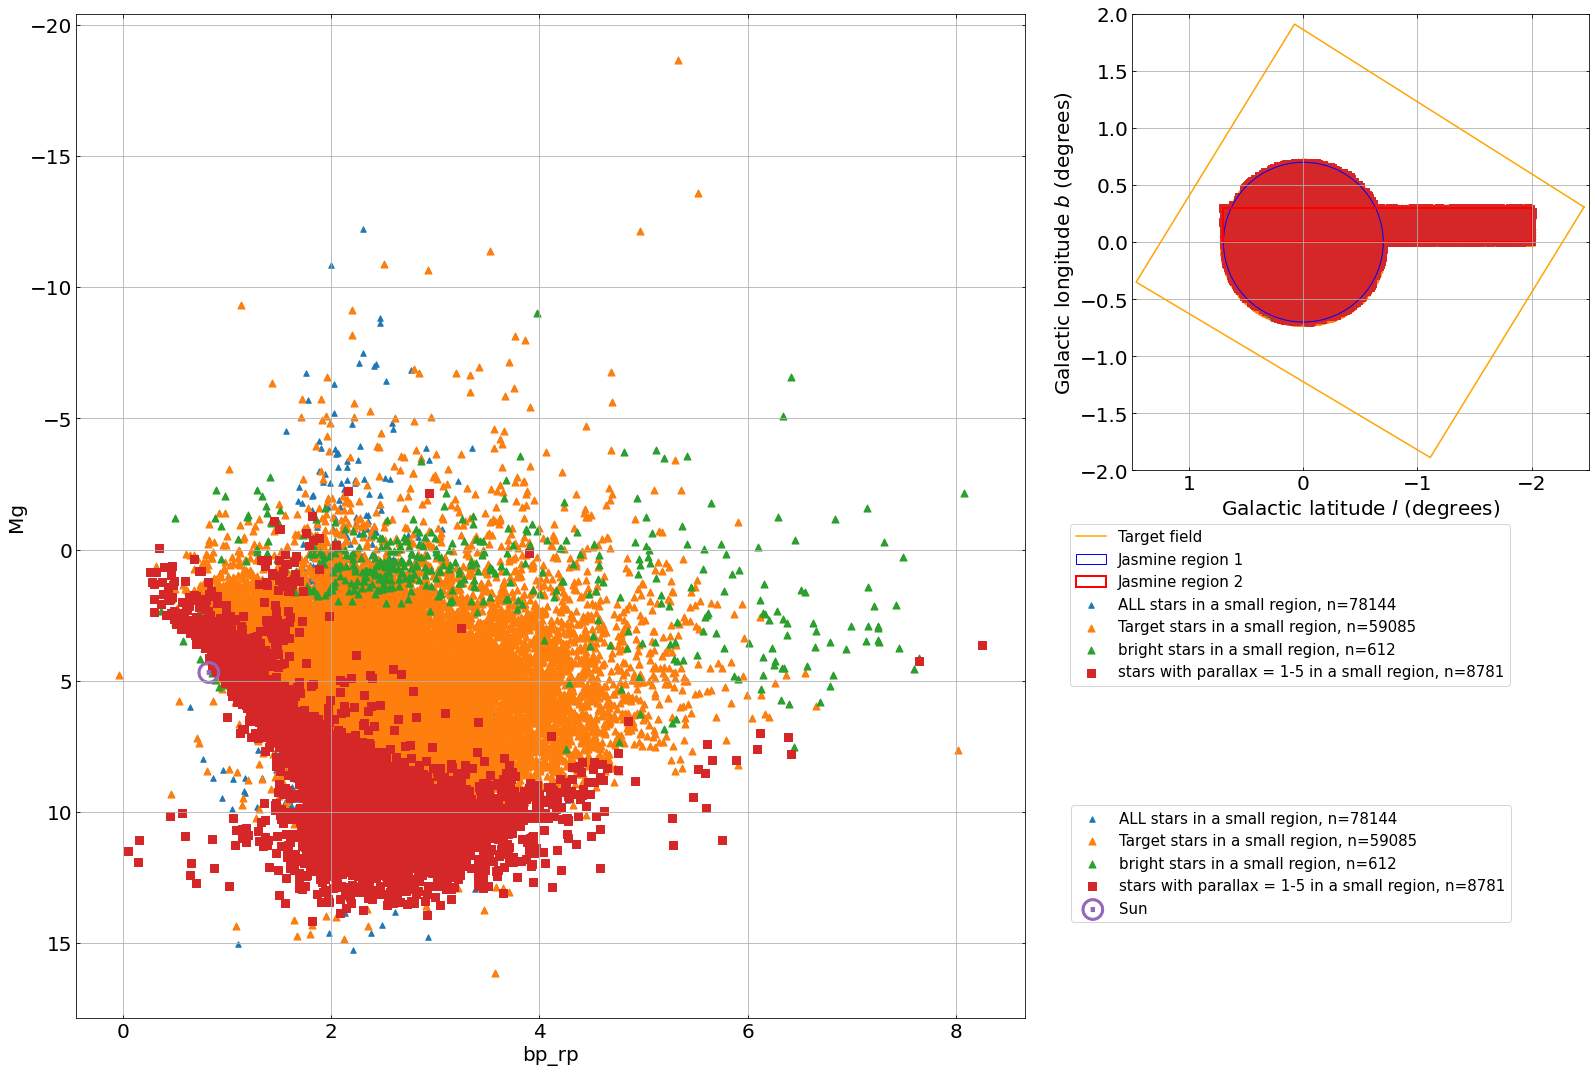

In [97]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = False # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = False # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

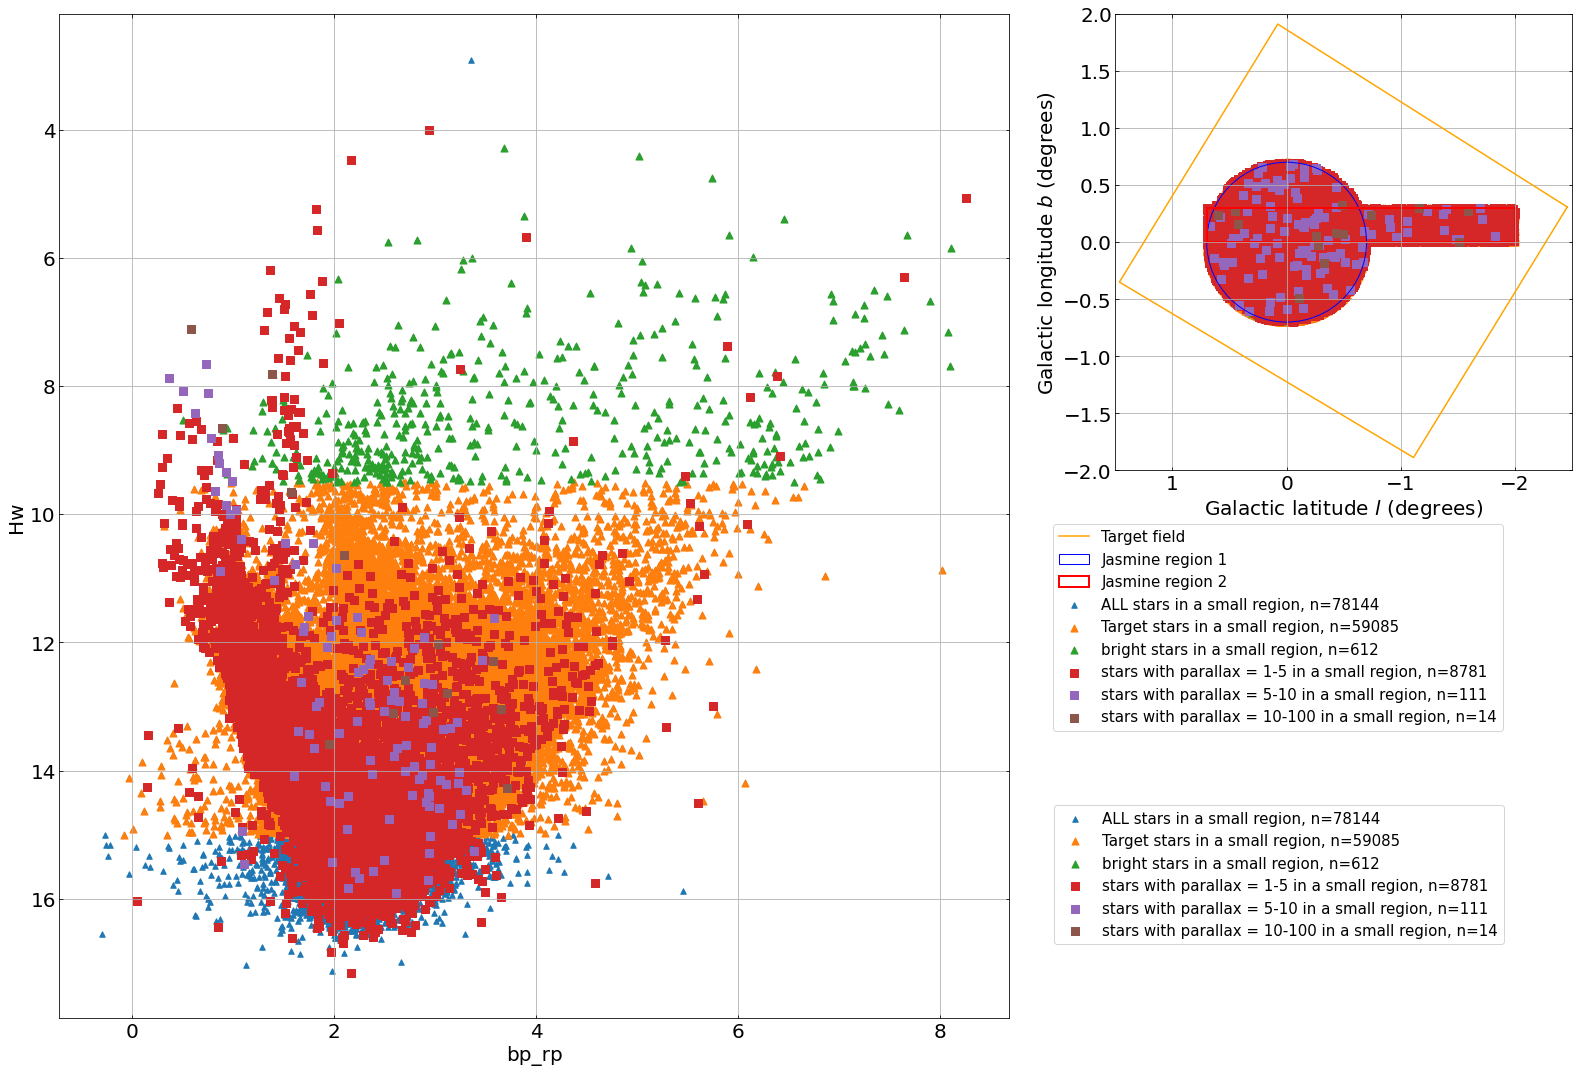

In [98]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = True  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

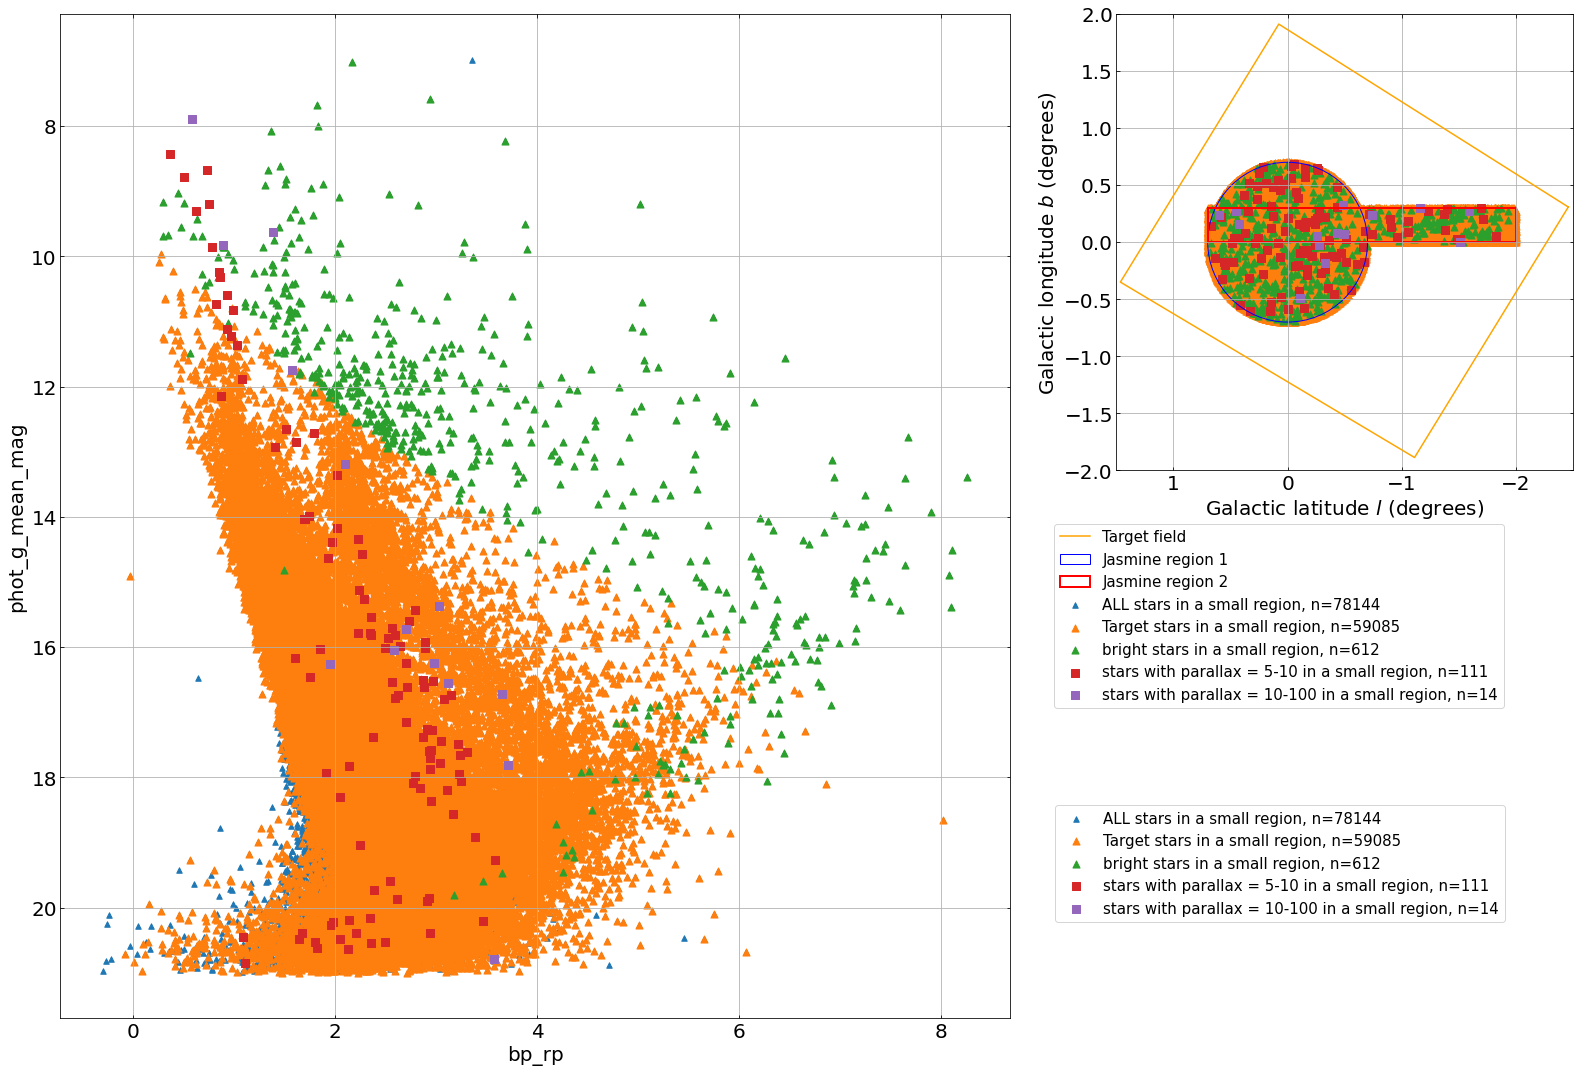

In [99]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # stars with parallax = 1-5
p8 = False  # stars with parallax = 1-5 in a small region
p9 = False  # stars with parallax = 5-10
p10 = True # stars with parallax = 5-10 in a small region
p11 = False  # stars with parallax = 10-100
p12 = True # stars with parallax = 10-100 in a small region
make_figure1("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12)

bp_rp TRAPPIST-1 = 4.901851  
bp_rp VB8 (M7V) = 4.728976  
bp_rp GJ625 (M1.5V) = 2.295460  
bp_rp GJ96 (M0V) = 1.981323  

In [100]:
pd.set_option('display.max_rows', 200)
pd_gaia2mass_jsky_m[["designation", "ra", "dec", "parallax", "parallax_over_error", "phot_g_mean_mag", "bp_rp", "Hw"]]

designation          ra        dec   parallax  \
9419    Gaia DR2 4057277350545375616  266.819413 -29.278311  11.103603   
36740   Gaia DR2 4056967490090373760  265.416254 -29.766980  10.159588   
109861  Gaia DR2 4057072188510525312  265.729527 -29.440013  10.462236   
115376  Gaia DR2 4057095072096565632  266.044449 -29.318533  13.621584   
115636  Gaia DR2 4057087031913813376  266.384004 -29.309729  15.339354   
117719  Gaia DR2 4057096446482441088  266.072287 -29.264079  13.700597   
120474  Gaia DR2 4057104688524235136  266.200783 -29.125673  17.279459   
120840  Gaia DR2 4057103902549306752  266.263000 -29.181505  13.296107   
123939  Gaia DR2 4057146985361182464  265.795120 -29.177499  10.815184   
293768  Gaia DR2 4056929217651884928  265.180695 -30.142829  11.648363   
298204  Gaia DR2 4056936566324422784  265.491027 -30.219834  11.276757   
306058  Gaia DR2 4057573802035360896  266.405565 -28.407681  13.134839   
306592  Gaia DR2 4057569236490414208  266.504069 -28.487344  27.336139   
307964  Gaia DR2 4057581743434796416  266.531198 -28.301658  18.176816   

        parallax_over_error  phot_g_mean_mag     bp_rp         Hw  
9419             147.364960        15.724694  2.700659  12.586658  
36740            134.645130        16.045097  2.585988  13.094944  
109861           301.547820        13.194123  2.099341  10.640664  
115376           108.546050        16.247713  2.976555  13.094089  
115636            22.653084        16.262712  1.951770  13.581129  
117719           269.730930        11.748167  1.568896   9.657822  
120474           119.772570        16.719028  3.649605  13.032433  
120840            91.699730        16.553844  3.121351  12.783157  
123939           227.065080         9.819413  0.884964   8.656439  
293768             3.274929        20.794563  3.575975  12.284788  
298204            53.725880        17.803646  3.710081  14.278170  
306058           107.745636         7.889491  0.577108   7.114756  
306592           438.047450         9.621899  1.383916   7.820411  
307964           213.258650        15.369143  3.026638  12.027892

In [101]:
pd_gaia2mass_jsky_n[["designation", "ra", "dec", "parallax", "parallax_over_error", "phot_g_mean_mag", "bp_rp", "Hw"]]

designation          ra        dec  parallax  \
6323    Gaia DR2 4057272570207679232  266.765388 -29.248648  9.950145   
7030    Gaia DR2 4057267283142183040  266.973202 -29.242472  8.395256   
7435    Gaia DR2 4057276319737740032  266.583308 -29.230230  5.906496   
7647    Gaia DR2 4057280610390591616  266.906913 -29.135896  6.572368   
10881   Gaia DR2 4057264225124880512  266.887236 -29.358590  5.113302   
18438   Gaia DR2 4057291983464069888  267.088494 -29.114699  5.990369   
24966   Gaia DR2 4057314008068512000  267.189661 -28.859798  5.561329   
25999   Gaia DR2 4057303940663864960  267.000941 -29.083651  9.414685   
26014   Gaia DR2 4057312255702735872  267.186710 -28.967035  7.574835   
33568   Gaia DR2 4056958354695453824  265.275184 -29.974865  5.270168   
35622   Gaia DR2 4056955567269652608  265.337918 -29.969302  5.098893   
35927   Gaia DR2 4056965497225370368  265.399901 -29.839214  5.109065   
104577  Gaia DR2 4057060398823608960  265.730761 -29.634621  6.322260   
107017  Gaia DR2 4057045937670369152  265.679005 -29.788473  5.865702   
107137  Gaia DR2 4057047823160500864  265.782680 -29.732325  7.988741   
108326  Gaia DR2 4057058509037245184  265.590595 -29.733678  7.428987   
108799  Gaia DR2 4057068301560415872  265.890659 -29.533323  6.503122   
109305  Gaia DR2 4057076960214458240  266.230529 -29.559260  5.316575   
109442  Gaia DR2 4057064350192968960  265.667349 -29.588891  5.030633   
110266  Gaia DR2 4057077956654797440  266.268009 -29.462338  5.654015   
110930  Gaia DR2 4057079575854922880  266.051020 -29.519373  5.088091   
111056  Gaia DR2 4057069194913695232  265.898700 -29.461526  6.014278   
112041  Gaia DR2 4057073764758721664  265.740777 -29.415118  5.393672   
113063  Gaia DR2 4057075379666466048  266.170755 -29.596616  6.285595   
113964  Gaia DR2 4057087955330967296  266.218521 -29.389182  5.748184   
114458  Gaia DR2 4057094797218634368  266.070219 -29.352515  7.830139   
114632  Gaia DR2 4057101802316107264  266.171862 -29.235808  6.205670   
114685  Gaia DR2 4057085691887888512  266.295538 -29.333256  5.095781   
114904  Gaia DR2 4057090326163814656  266.344092 -29.272549  5.390235   
114969  Gaia DR2 4057086306063634944  266.440622 -29.340936  5.137905   
116902  Gaia DR2 4057094724199516800  266.072795 -29.354413  7.990156   
117303  Gaia DR2 4057085481438890496  266.276364 -29.367238  7.607572   
118277  Gaia DR2 4057109331388086400  266.074463 -29.041770  5.181245   
118383  Gaia DR2 4057109915503641600  266.134055 -28.983841  5.639742   
119768  Gaia DR2 4057108987790685312  266.110399 -29.058172  5.954849   
120370  Gaia DR2 4057104624103851648  266.211676 -29.133982  5.274708   
120721  Gaia DR2 4057103520304818304  266.261066 -29.186773  9.576870   
120780  Gaia DR2 4057104035689133568  266.288588 -29.152326  5.489411   
124414  Gaia DR2 4057148570205807232  265.843697 -29.146008  6.393580   
145759  Gaia DR2 4057154102127182592  265.992127 -29.102963  5.853917   
146289  Gaia DR2 4057171213277069824  265.629348 -28.831085  5.084161   
147368  Gaia DR2 4057163516695589120  265.668873 -29.052394  5.900564   
147676  Gaia DR2 4057156129351749760  266.046483 -29.047519  7.493840   
148005  Gaia DR2 4057154956820487680  265.995854 -29.034342  6.108241   
161099  Gaia DR2 4057177290651946752  265.619490 -28.813607  5.508398   
166271  Gaia DR2 4057178394462370816  265.758511 -28.764941  9.244856   
263871  Gaia DR2 4057502814814109952  266.675165 -28.805915  5.234521   
263890  Gaia DR2 4057511645264841344  266.859671 -28.622803  8.000676   
264487  Gaia DR2 4057518998250984704  266.577194 -28.696815  5.144631   
264588  Gaia DR2 4057509519264376448  267.064089 -28.612012  5.055300   
266242  Gaia DR2 4057512229394662400  266.925362 -28.569851  7.559934   
269372  Gaia DR2 4056894033267377024  266.589878 -29.450771  5.966145   
270237  Gaia DR2 4056892418366824448  266.607476 -29.522391  7.048970   
271895  Gaia DR2 4056890150624089600  266.485554 -29.630028  5.274767   
280059  Ga

In [102]:
def make_figure2(x, y, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14):
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    from astropy.table import QTable

    import numpy as np
    import matplotlib.pyplot as pp
    import matplotlib.patches as patches
    from matplotlib import gridspec

    region1 = [[0.7, 0.7, -0.7, -0.7, 0.7],[0.7, -0.7, -0.7, 0.7, 0.7]] # galactic coordinate (l, b)
    region2 = [[-2, -2, 0.7, 0.7, -2],[0, 0.3, 0.3 ,0, 0]] # galactic coordinate (l, b)

    ####

    lcenter = -0.5
    bcenter = 0
    ct2 = SkyCoord(l=lcenter*u.degree, b=bcenter*u.degree, frame='galactic')
    sky_org = [ct2.icrs.ra.degree, ct2.icrs.dec.degree]
    width = 3
    height = 3
    sky1 = [[sky_org[0]-width/2, sky_org[0]-width/2, sky_org[0]+width/2, sky_org[0]+width/2, sky_org[0]-width/2], 
        [sky_org[1]-height/2, sky_org[1]+height/2, sky_org[1]+height/2, sky_org[1]-height/2, sky_org[1]-height/2]]

    sky1_radec = SkyCoord(ra=sky1[0]*u.degree, dec=sky1[1]*u.degree, frame='icrs')
    sky1_l = sky1_radec.galactic.l.degree
    sky1_b = sky1_radec.galactic.b.degree
    sky1_l = np.where(sky1_l>180, sky1_l-360, sky1_l)

    fig = pp.figure(figsize=(30,15))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(2,4,3)

    ax1.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax1.grid(True)
    # ax1.set_aspect('equal')
    ax1.invert_yaxis()

    if p1: ax1.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax1.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax1.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax1.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax1.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax1.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))

    if p7: ax1.scatter(pd_gaia2mass_s[x], pd_gaia2mass_s[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_s)+"-"+str(max_parallax_s)+", n="+str(len(pd_gaia2mass_s)))
    if p8: ax1.scatter(pd_gaia2mass_jsky_s[x], pd_gaia2mass_jsky_s[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_s)+"-"+str(max_parallax_s)+" in a small region, n="+str(len(pd_gaia2mass_jsky_s)))
    if p9: ax1.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p10: ax1.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p11: ax1.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p12: ax1.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p13: ax1.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p14: ax1.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))

    if x == "bp_rp" and y == "Mg": 
        print("The Sun")
        ax1.scatter(0.82, 4.67, s=500, marker='$\\bigodot$', label="Sun") # Sun (Casagrande & VandenBerg 2018)

    if x == "distance" : ax1.set_xscale("log")
    if y == "distance" : ax1.set_yscale("log")

    ax1.legend(bbox_to_anchor=(1.04, 0.22), loc='upper left', fontsize=15)
    #ax1.legend(loc='upper right', fontsize=15)
    ax1.set_xlabel(x, fontsize=20)
    ax1.set_ylabel(y, fontsize=20)

    ###

    ax2.tick_params(axis='both', which='both', top=True, right=True, direction='in', labelsize=20.0)
    ax2.grid(True)
    ax2.set_aspect('equal')
    ax2.set_xlim(1.5,-2.5)
    ax2.set_ylim(-2,2)
    ax2.set_xlabel("Galactic latitude $l$ (degrees)", fontsize=20)
    ax2.set_ylabel("Galactic longitude $b$ (degrees)", fontsize=20)

    r1 = patches.Circle(xy=(0,0), radius=0.7, fill=False, color="blue", label="Jasmine region 1")
    ax2.add_patch(r1)
    r2 = patches.Rectangle(xy=(-2,0), height=0.3, width=2.7, fill=False, color="red", lw=2, label="Jasmine region 2")
    ax2.add_patch(r2)
    ax2.plot(sky1_l, sky1_b, "orange", label="Target field")
    
    x = "l"
    y = "b"
    if p1: ax2.scatter(pd_gaia2mass[x], pd_gaia2mass[y], s=30, marker=".", label="ALL stars, n="+str(len(pd_gaia2mass)))
    if p2: ax2.scatter(pd_gaia2mass_jsky[x], pd_gaia2mass_jsky[y], s=30, marker="^", label="ALL stars in a small region, n="+str(len(pd_gaia2mass_jsky)))
    if p3: ax2.scatter(pd_gaia2mass_t[x], pd_gaia2mass_t[y], s=30, marker=".", label="Target stars in a whole region, n="+str(len(pd_gaia2mass_t)))
    if p4: ax2.scatter(pd_gaia2mass_jsky_t[x], pd_gaia2mass_jsky_t[y], s=50, marker="^", label="Target stars in a small region, n="+str(len(pd_gaia2mass_jsky_t)))
    if p5: ax2.scatter(pd_gaia2mass_b[x], pd_gaia2mass_b[y], s=50, marker=".", label="bright stars in a whole region, n="+str(len(pd_gaia2mass_b)))
    if p6: ax2.scatter(pd_gaia2mass_jsky_b[x], pd_gaia2mass_jsky_b[y], s=50, marker="^", label="bright stars in a small region, n="+str(len(pd_gaia2mass_jsky_b)))


    if p7: ax2.scatter(pd_gaia2mass_s[x], pd_gaia2mass_s[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_s)+"-"+str(max_parallax_s)+", n="+str(len(pd_gaia2mass_s)))
    if p8: ax2.scatter(pd_gaia2mass_jsky_s[x], pd_gaia2mass_jsky_s[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_s)+"-"+str(max_parallax_s)+" in a small region, n="+str(len(pd_gaia2mass_jsky_s)))
    if p9: ax2.scatter(pd_gaia2mass_f[x], pd_gaia2mass_f[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+", n="+str(len(pd_gaia2mass_f)))
    if p10: ax2.scatter(pd_gaia2mass_jsky_f[x], pd_gaia2mass_jsky_f[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_f)+"-"+str(max_parallax_f)+" in a small region, n="+str(len(pd_gaia2mass_jsky_f)))
    if p11: ax2.scatter(pd_gaia2mass_n[x], pd_gaia2mass_n[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+", n="+str(len(pd_gaia2mass_n)))
    if p12: ax2.scatter(pd_gaia2mass_jsky_n[x], pd_gaia2mass_jsky_n[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_n)+"-"+str(max_parallax_n)+" in a small region, n="+str(len(pd_gaia2mass_jsky_n)))
    if p13: ax2.scatter(pd_gaia2mass_m[x], pd_gaia2mass_m[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+", n="+str(len(pd_gaia2mass_m)))
    if p14: ax2.scatter(pd_gaia2mass_jsky_m[x], pd_gaia2mass_jsky_m[y], s=50, marker=",", label="target stars with parallax = "+str(min_parallax_m)+"-"+str(max_parallax_m)+" in a small region, n="+str(len(pd_gaia2mass_jsky_m)))


    ax2.legend(loc="lower left", fontsize=15)
    ax2.legend(bbox_to_anchor=(-0.1525, -0.1), loc='upper left', fontsize=15)
    
    fig.subplots_adjust(left=0.035, right=0.98, bottom=0.05, top=0.98, wspace=0.15)

    #fig.tight_layout()
    pp.show()

    fig.savefig("plot.png")
 

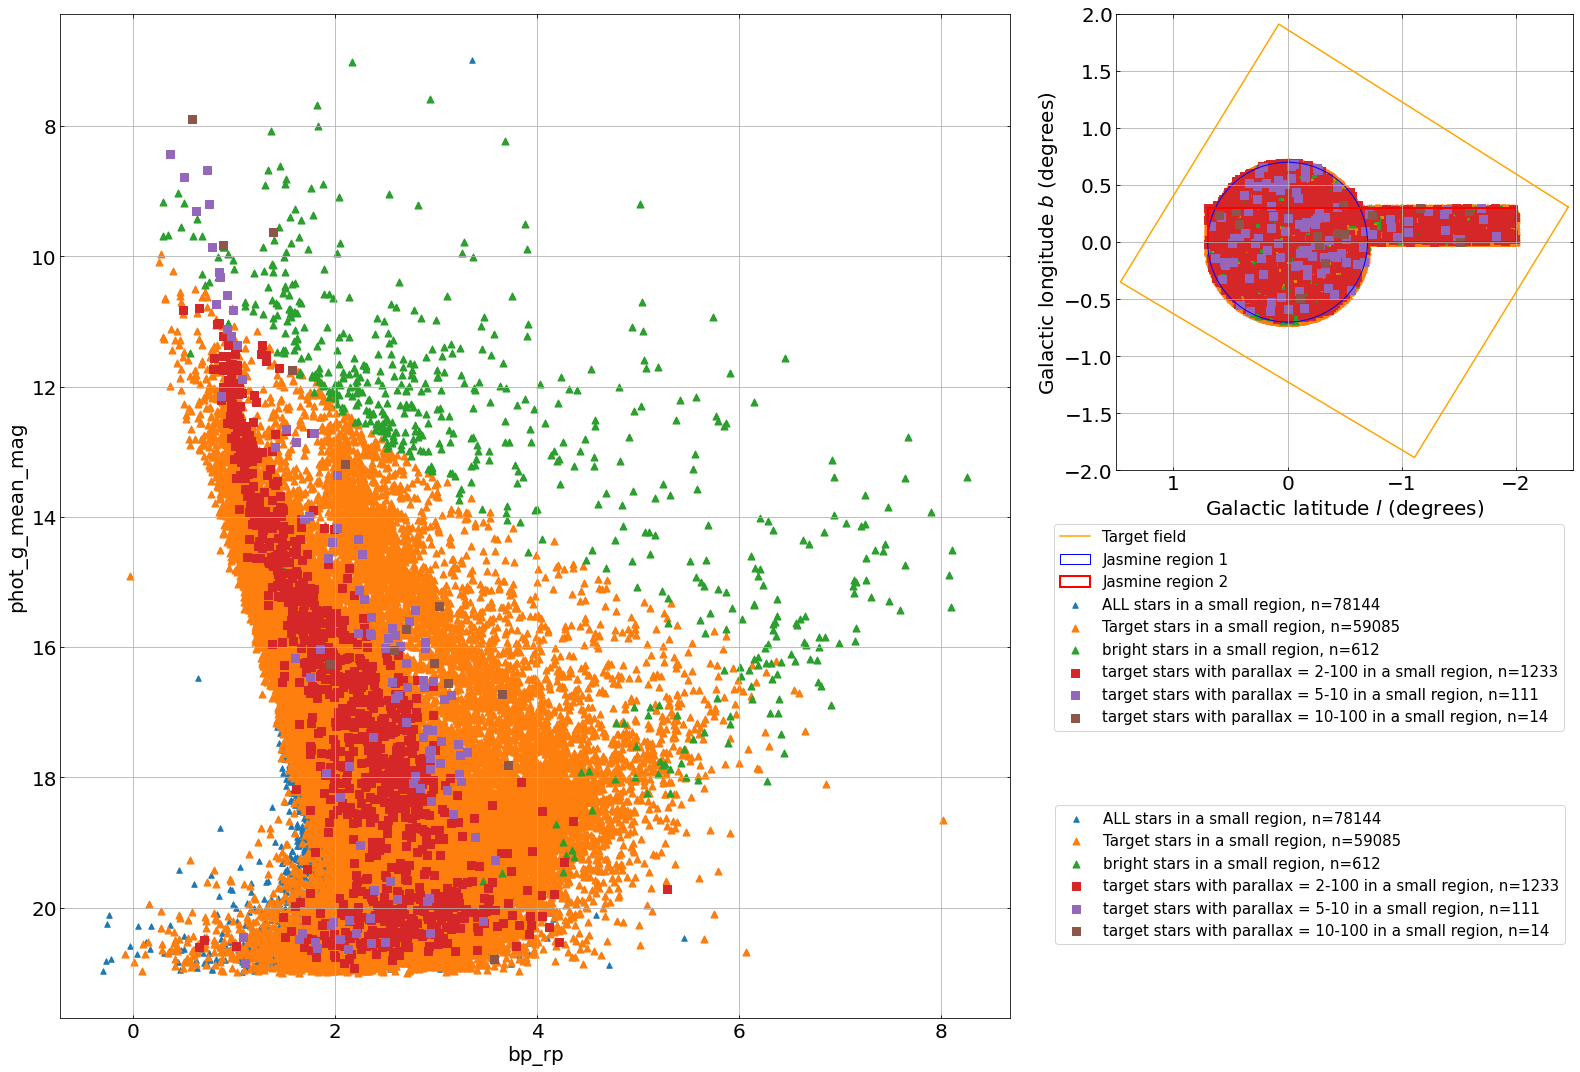

In [103]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # Target stars with parallax = 10-100
p8 = True # Target stars with parallax = 10-100 in a small region
p9 = False  # stars with parallax = 1-5
p10 = False  # stars with parallax = 1-5 in a small region
p11 = False  # stars with parallax = 5-10
p12 = True # stars with parallax = 5-10 in a small region
p13 = False  # stars with parallax = 10-100
p14 = True # stars with parallax = 10-100 in a small region
make_figure2("bp_rp", "phot_g_mean_mag", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14)

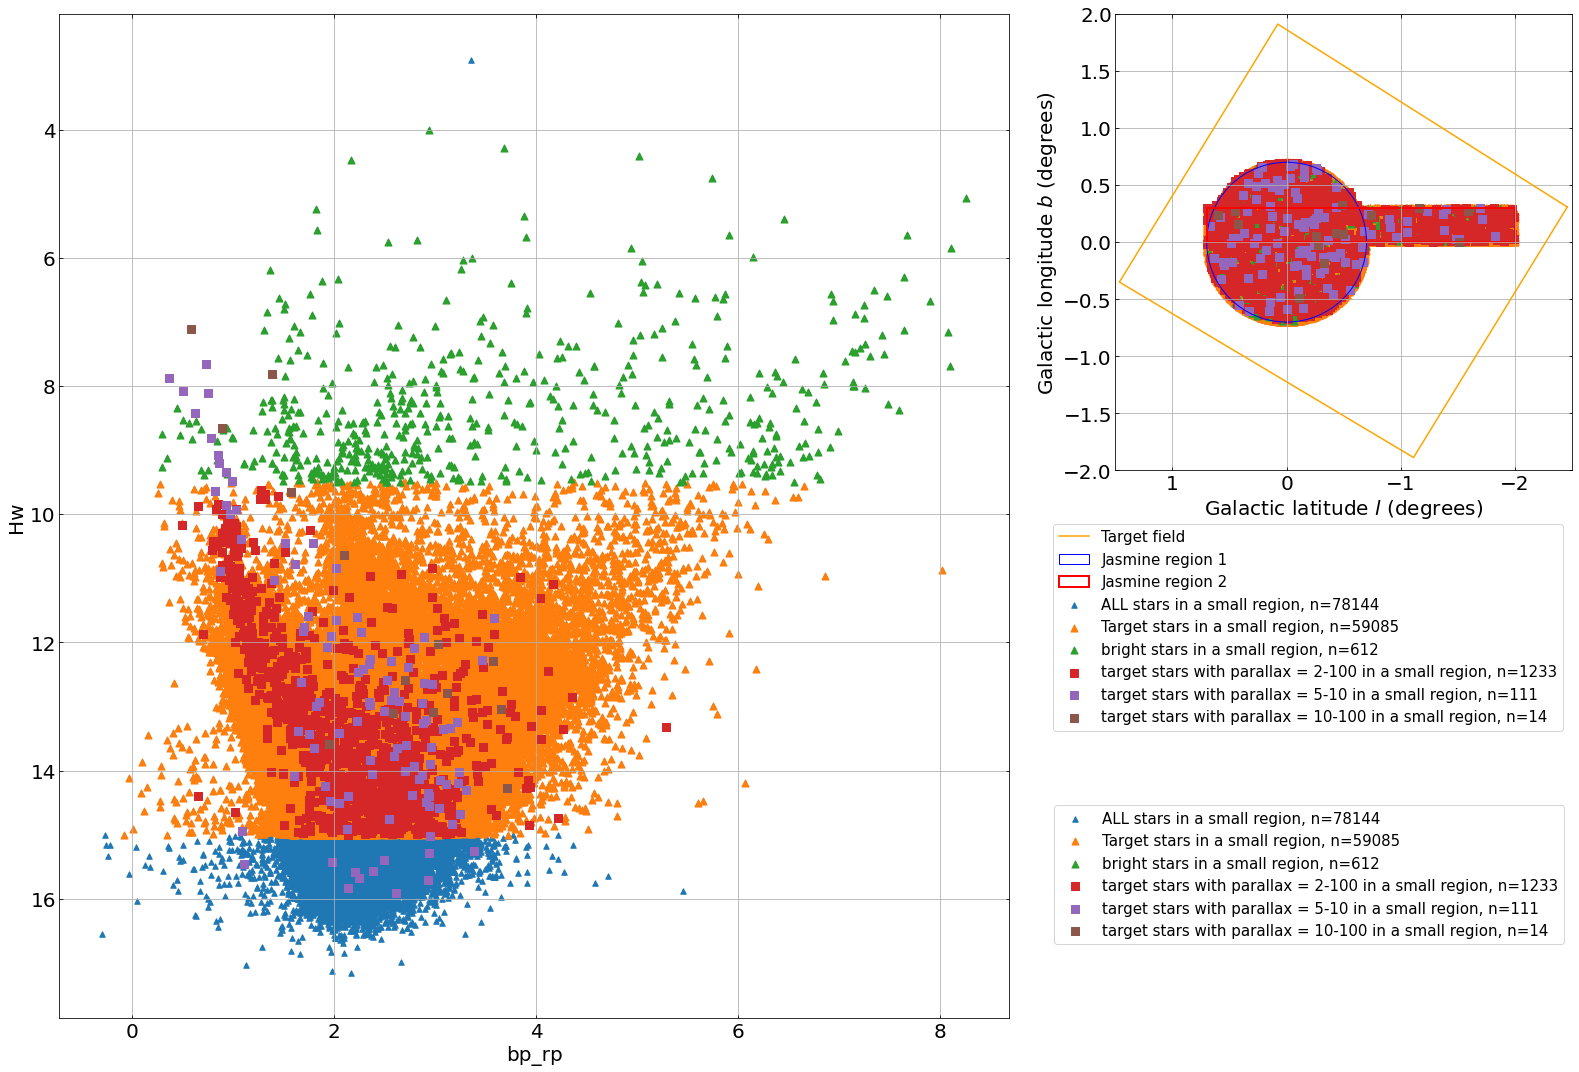

In [104]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # Target stars with parallax = 10-100
p8 = True # Target stars with parallax = 10-100 in a small region
p9 = False  # stars with parallax = 1-5
p10 = False  # stars with parallax = 1-5 in a small region
p11 = False  # stars with parallax = 5-10
p12 = True # stars with parallax = 5-10 in a small region
p13 = False  # stars with parallax = 10-100
p14 = True # stars with parallax = 10-100 in a small region
make_figure2("bp_rp", "Hw", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14)

The Sun


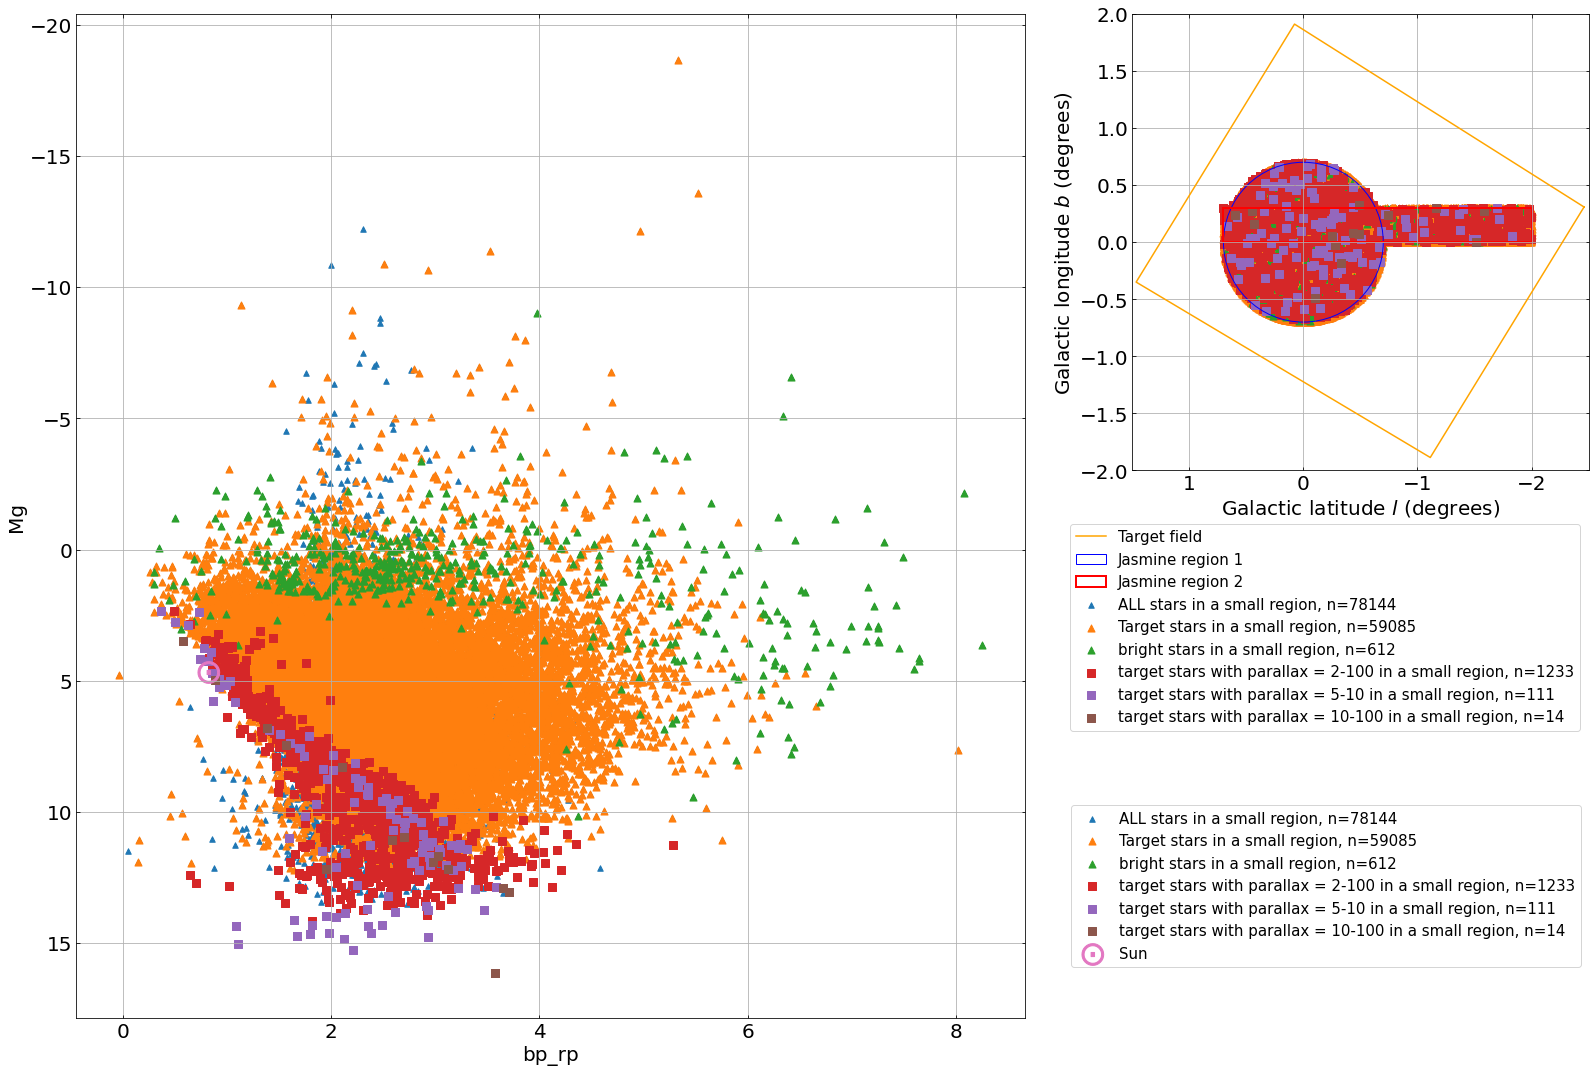

In [105]:
p1 = False  # ALL stars
p2 = True  # ALL stars in a small region
p3 = False  # Target stars in a whole region
p4 = True  # Target stars in a small region
p5 = False  # bright stars in a whole region
p6 = True  # bright stars in a small region
p7 = False  # Target stars with parallax = 10-100
p8 = True # Target stars with parallax = 10-100 in a small region
p9 = False  # stars with parallax = 1-5
p10 = False  # stars with parallax = 1-5 in a small region
p11 = False  # stars with parallax = 5-10
p12 = True # stars with parallax = 5-10 in a small region
p13 = False  # stars with parallax = 10-100
p14 = True # stars with parallax = 10-100 in a small region
make_figure2("bp_rp", "Mg", p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14)